## Importing Data

Import the data 'breast\-cancer.csv' into original



In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

url='https://raw.githubusercontent.com/edmundyoyo/SC1015_MiniProj/main/breast-cancer.csv'
original = pd.read_csv(url)

diagnosis = pd.DataFrame(original['diagnosis'])

In [2]:
original.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [3]:
#Check how many "B" and "M" there are in the original dataset.
count_B = pd.DataFrame(original['diagnosis']).value_counts()[
    'B']  # counting number of "B"s in the Diagnosis column
count_M = pd.DataFrame(original['diagnosis']).value_counts()[
    'M']  # counting number of "M"s in the Diagnosis column

print("Count of 'B':", count_B)
print("Count of 'M':", count_M)

Count of 'B': 357
Count of 'M': 212


In [4]:
original.info() # check for NaN value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Create new variable with all "mean" variables as meanbreast and all "worst" variables as worstbreast



In [5]:
#Create a new variable with all the "mean" variables, this is to find out which is the best predictor for "M"
meanbreast = pd.DataFrame(original[[
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]])

#Create a new variable with all the "worst" variables, this is to find out which is the best predictor for "M"
worstbreast = pd.DataFrame(original[[
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]])

## Removing outliers in meanbreast



In [6]:
newmean = pd.DataFrame(original[[
    'diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]])

data_no_outliers = pd.DataFrame()
#finding outliers
for column in newmean: 
    if column != 'diagnosis':
        df_M = newmean[original['diagnosis'] == 'M'][column]
        df_B = newmean[original['diagnosis'] == 'B'][column]
        
        Q1_M = df_M.quantile(0.25)
        Q3_M = df_M.quantile(0.75)
        IQR_M = Q3_M - Q1_M
        lower_bound_M = Q1_M - 1.5 * IQR_M
        upper_bound_M = Q3_M + 1.5 * IQR_M

        # Calculate quartiles and IQR for B category
        Q1_B = df_B.quantile(0.25)
        Q3_B = df_B.quantile(0.75)
        IQR_B = Q3_B - Q1_B
        lower_bound_B = Q1_B - 1.5 * IQR_B
        upper_bound_B = Q3_B + 1.5 * IQR_B
        
        data_no_outliers[column] = pd.concat([df_M[(df_M > lower_bound_M) & (df_M < upper_bound_M)], df_B[(df_B > lower_bound_B) & (df_B < upper_bound_B)]])     

In [7]:
#removing outliers to determine whether classification accuracy would improve

#Fitler rows with NaN caused by outliers
meanbreast_cleaned = data_no_outliers.dropna()

# Filter rows with zero values and drop them
meanbreast_cleaned = meanbreast_cleaned[(meanbreast_cleaned != 0).all(axis=1)]

newmean_cleaned = newmean.loc[meanbreast_cleaned.index]

In [8]:
dectree_classification = []  # Create an array to store classification
dectree = DecisionTreeClassifier(max_depth=4)  #Create a 4-depth tree
diagnosis_cleaned = pd.DataFrame(data = newmean_cleaned["diagnosis"])

for column in meanbreast_cleaned:
    X_train, X_test, y_train, y_test = train_test_split(meanbreast_cleaned[column], diagnosis_cleaned, test_size=0.25, random_state=1)  #using a loop to calculate
    dectree.fit(X_train.values.reshape(-1, 1), y_train)  #train the tree based on the split above
    classificiation = dectree.score(X_train.values.reshape(-1, 1),y_train)  #get the classification accuracy.
    dectree_classification.append(classificiation)  #append each classificiation to dectree_classification
    
dectree_classification

[0.896358543417367,
 0.7787114845938375,
 0.927170868347339,
 0.8935574229691877,
 0.680672268907563,
 0.84593837535014,
 0.9215686274509803,
 0.9439775910364145,
 0.6834733893557423,
 0.6638655462184874]

In [9]:
dectree_classification = []  # Create an array to store classification
dectree = DecisionTreeClassifier(max_depth=4)  #Create a 4-depth tree

for column in meanbreast:
    X_train, X_test, y_train, y_test = train_test_split(meanbreast[column], diagnosis, test_size=0.25, random_state=1)  #using a loop to calculate
    dectree.fit(X_train.values.reshape(-1, 1), y_train)  #train the tree based on the split above
    classificiation = dectree.score(X_train.values.reshape(-1, 1),y_train)  #get the classification accuracy.
    dectree_classification.append(classificiation)  #append each classificiation to dectree_classification
    
dectree_classification

[0.9084507042253521,
 0.7769953051643192,
 0.92018779342723,
 0.9084507042253521,
 0.6995305164319249,
 0.8380281690140845,
 0.9154929577464789,
 0.9436619718309859,
 0.6995305164319249,
 0.6784037558685446]

From above comparison, we can see that removing outliers did not improve the classification accuracy, instead it actually decreased a little. Hence, we decided to keep the outliers.


## Formatting meanbreast

The next few lines of codes we will figure out which is the best "mean" variable based on the classification accuracy to be used as a predictor for diagnosing "M" or "B"

After we have found the best "mean" variable, we will find the TPR and FPR rate to see if it is truly viable to be used as a predictor.



In [10]:
#This cell is to compare the classification values previously. We can determine the highest and lowest classification accuracy.
highest_mean_classification = 0
lowest_mean_classification = 100
highest_mean_classification_name = ""
lowest_mean_classification_name = ""

for classification, column in zip(dectree_classification, meanbreast):  #to iterate through dectree_classification and meanbreast same time
    if highest_mean_classification < classification:
        highest_mean_classification = classification
        highest_mean_classification_name = column
    elif lowest_mean_classification > classification:
        lowest_mean_classification = classification
        lowest_mean_classification_name = column

In [11]:
#Print the highest/lowest clasification, and show which column it belongs to.
print("The Highest classification accuracy of '{:.5}' in the decision tree of depth 4 is: \t {}".format(highest_mean_classification, highest_mean_classification_name))
print("The Lowest classification accuracy of '{:.5}' in the decision tree of depth 4 is: \t {}".format(lowest_mean_classification, lowest_mean_classification_name))

The Highest classification accuracy of '0.94366' in the decision tree of depth 4 is: 	 concave points_mean
The Lowest classification accuracy of '0.6784' in the decision tree of depth 4 is: 	 fractal_dimension_mean


The TPR for the 'concave points_mean' Train Set is: 	 0.93631
The FPR for the 'concave points_mean' Train Set is: 	 0.05204

The TPR for the 'concave points_mean' Test Set is: 	 0.89091
The FPR for the 'concave points_mean' Test Set is: 	 0.01136



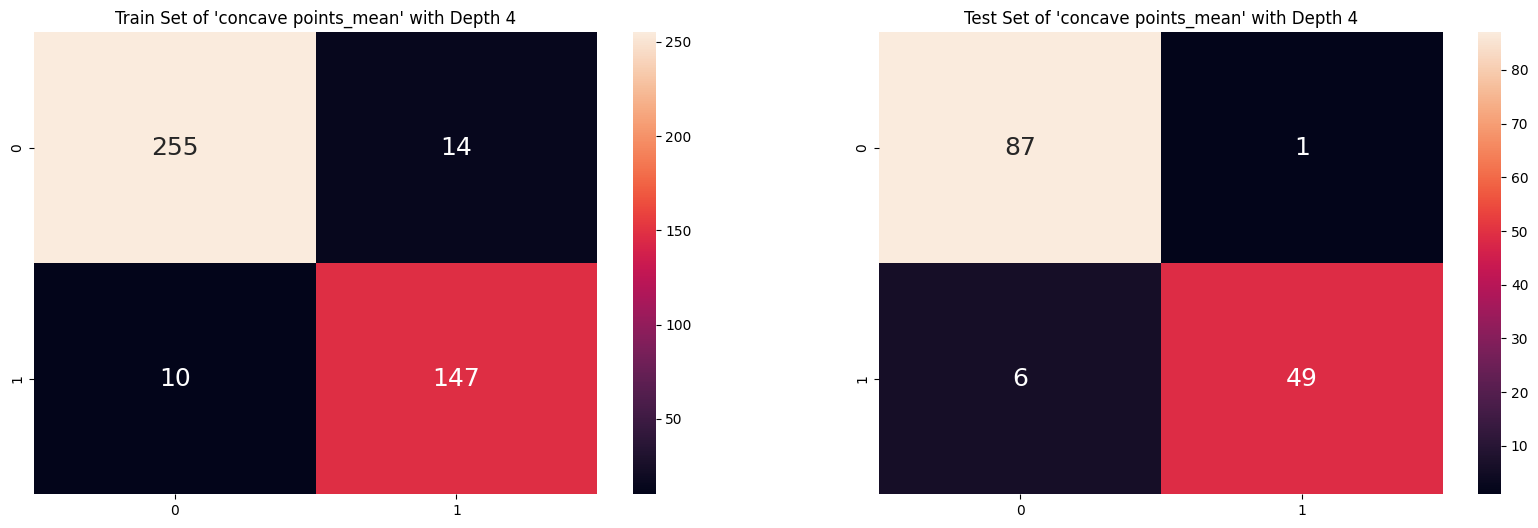

In [12]:
#this is to generate the heatmap/confusion matrix of the highest classification accuracy. We want to see the TPR/FPR

X_train, X_test, y_train, y_test = train_test_split(
    meanbreast[highest_mean_classification_name],
    diagnosis,
    test_size=0.25,
    random_state=1)

dectree.fit(X_train.values.reshape(-1, 1), y_train)  # To get the Train Set
highest_mean_pred = dectree.predict(X_train.values.reshape(-1, 1))
highest_mean_matrix = confusion_matrix(y_train, highest_mean_pred)
TP = highest_mean_matrix[1][1]
FN = highest_mean_matrix[1][0]
FP = highest_mean_matrix[0][1]
TN = highest_mean_matrix[0][0]
print("The TPR for the '{}' Train Set is: \t {:.5f}".format(
    highest_mean_classification_name, (TP / (TP + FN))))
print("The FPR for the '{}' Train Set is: \t {:.5f}\n".format(
    highest_mean_classification_name, (FP / (FP + TN))))

dectree.fit(X_test.values.reshape(-1, 1), y_test)  # To get the Test Set
highest_mean_pred_train = dectree.predict(X_test.values.reshape(-1, 1))
highest_mean_train_matrix = confusion_matrix(y_test, highest_mean_pred_train)
TP = highest_mean_train_matrix[1][1]
FN = highest_mean_train_matrix[1][0]
FP = highest_mean_train_matrix[0][1]
TN = highest_mean_train_matrix[0][0]
print("The TPR for the '{}' Test Set is: \t {:.5f}".format(
    highest_mean_classification_name, (TP / (TP + FN))))
print("The FPR for the '{}' Test Set is: \t {:.5f}\n".format(
    highest_mean_classification_name, (FP / (FP + TN))))

f, axes = plt.subplots(
    1, 2, figsize=(20, 6))  # to generate the heatmap of the Test and Train Set
sb.heatmap(highest_mean_matrix,
           annot=True,
           fmt=".0f",
           annot_kws={"size": 18},
           ax=axes[0])
axes[0].set_title(
    "Train Set of '{}' with Depth 4".format(highest_mean_classification_name))
sb.heatmap(highest_mean_train_matrix,
           annot=True,
           fmt=".0f",
           annot_kws={"size": 18},
           ax=axes[1])
axes[1].set_title(
    "Test Set of '{}' with Depth 4".format(highest_mean_classification_name))
plt.show()

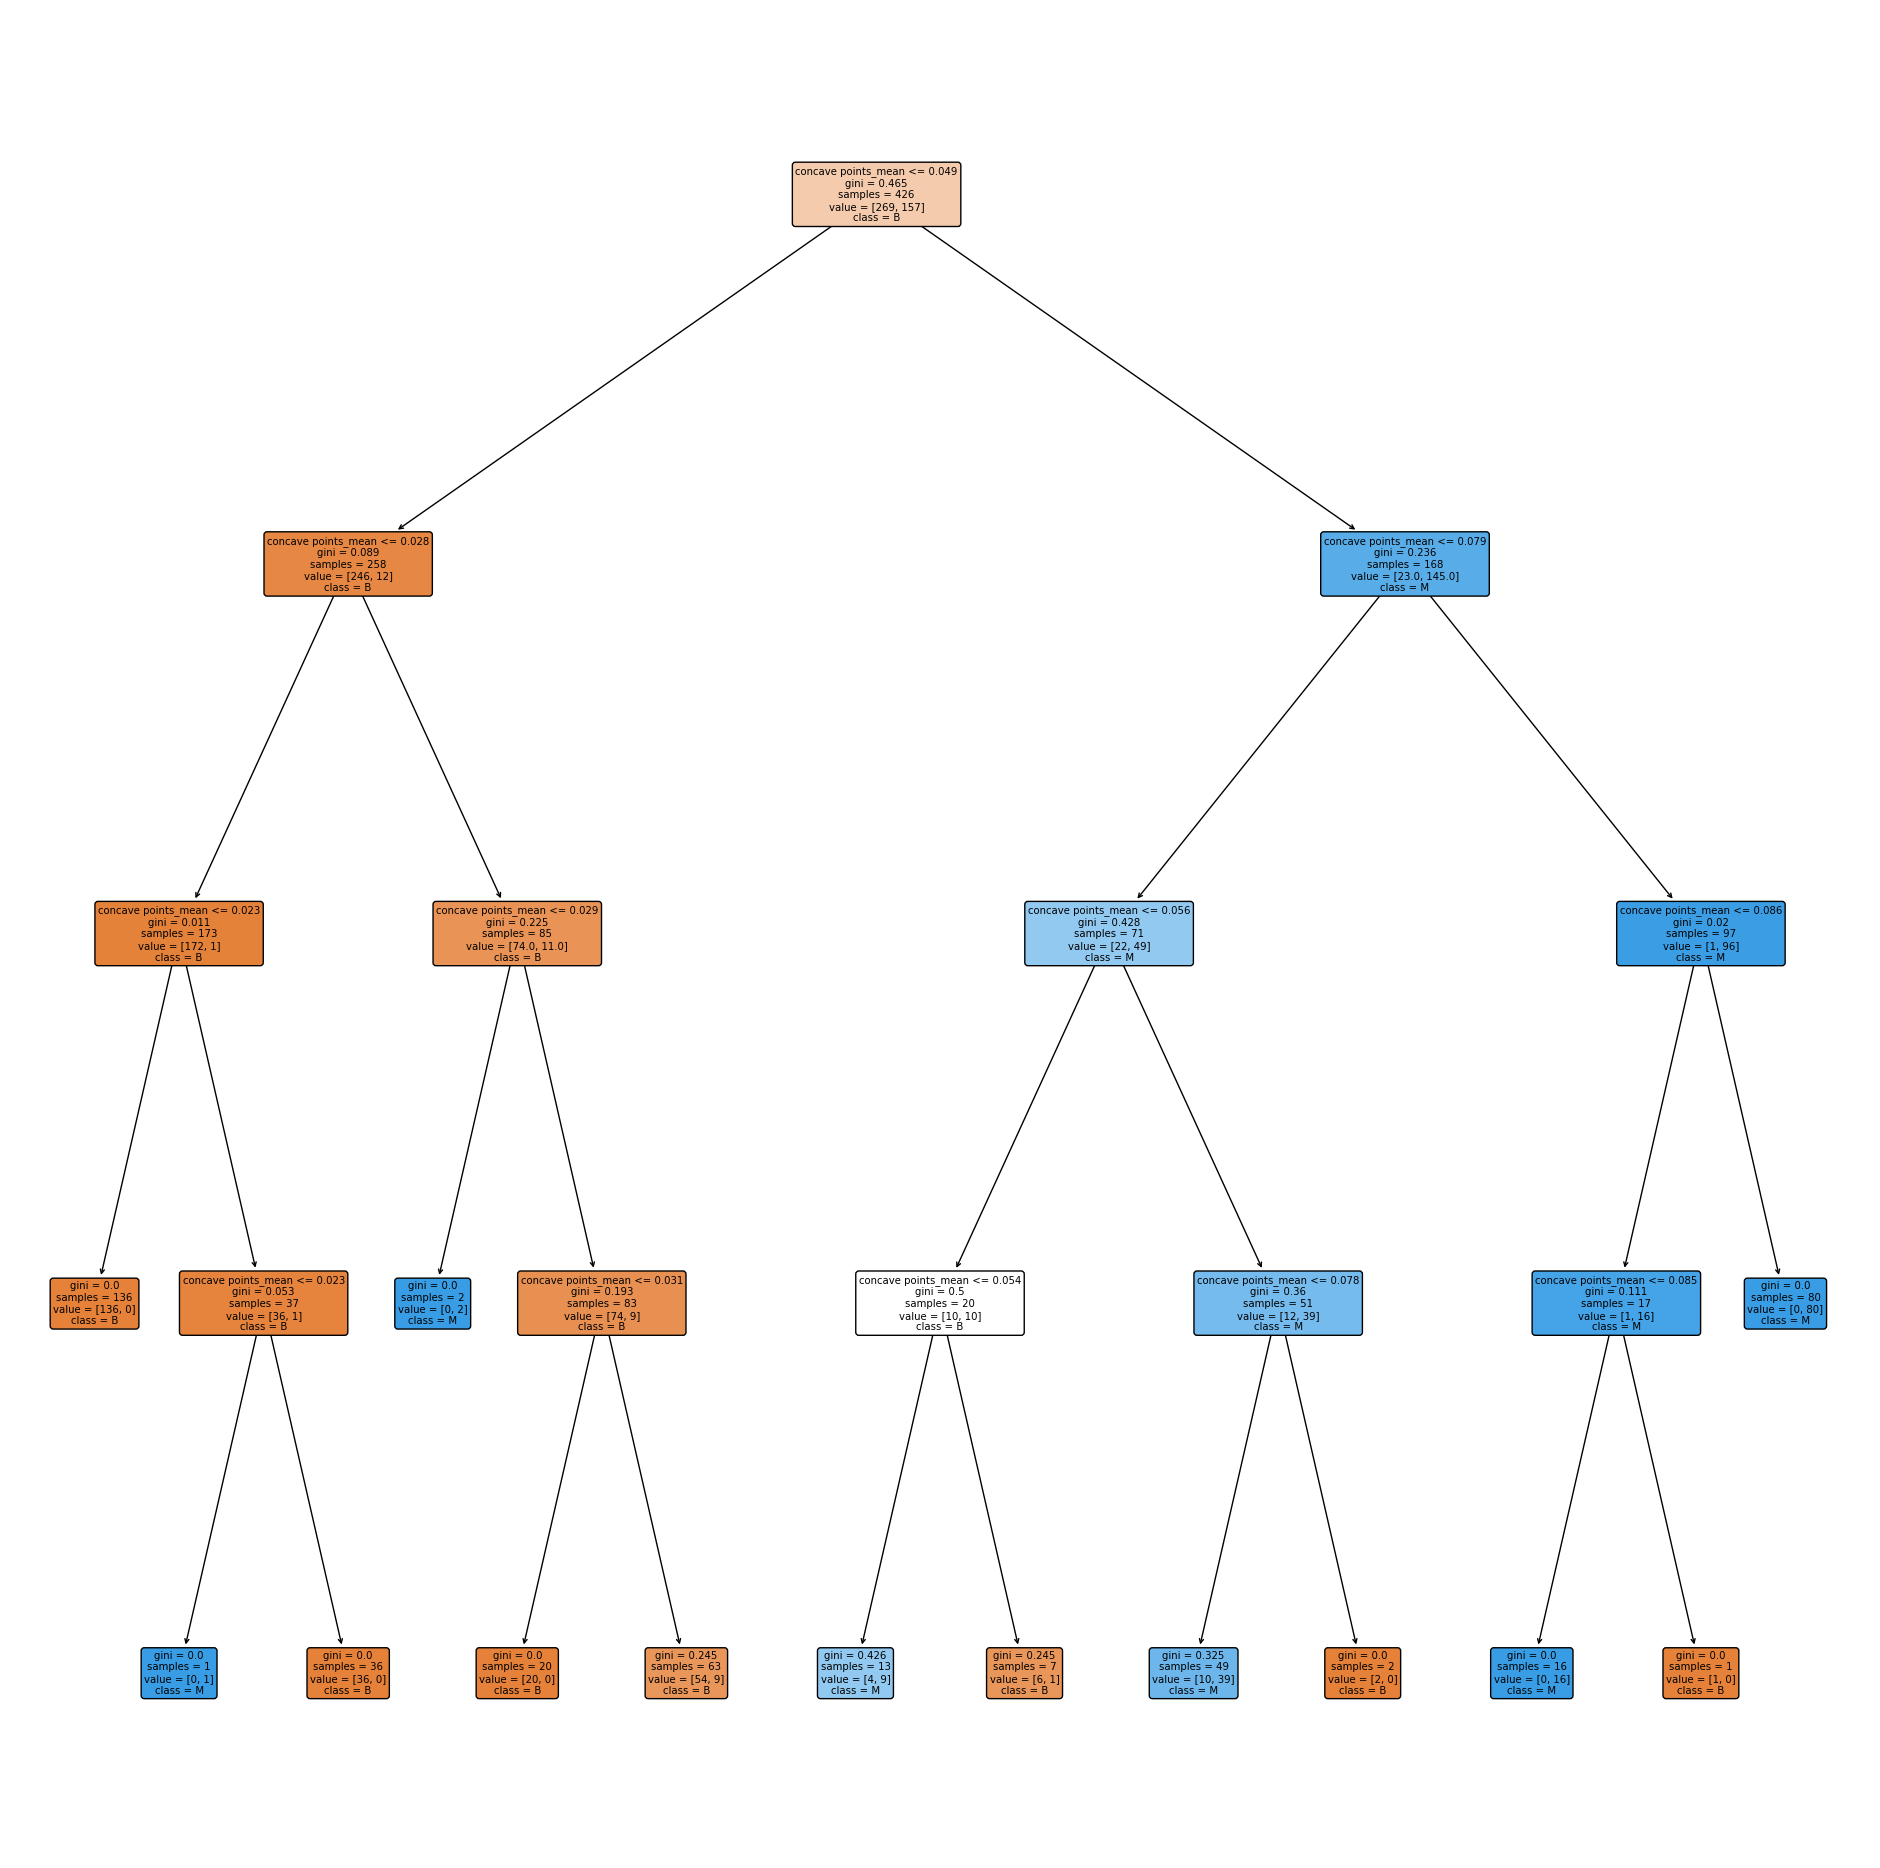

In [13]:
#Tree of the Train Set (Highest Mean)
dectree.fit(X_train.values.reshape(-1, 1), y_train)
f = plt.figure(figsize=(24, 24))
plot_tree(dectree,
          filled=True,
          rounded=True,
          feature_names=[highest_mean_classification_name],
          class_names=["B", "M"])
plt.show()

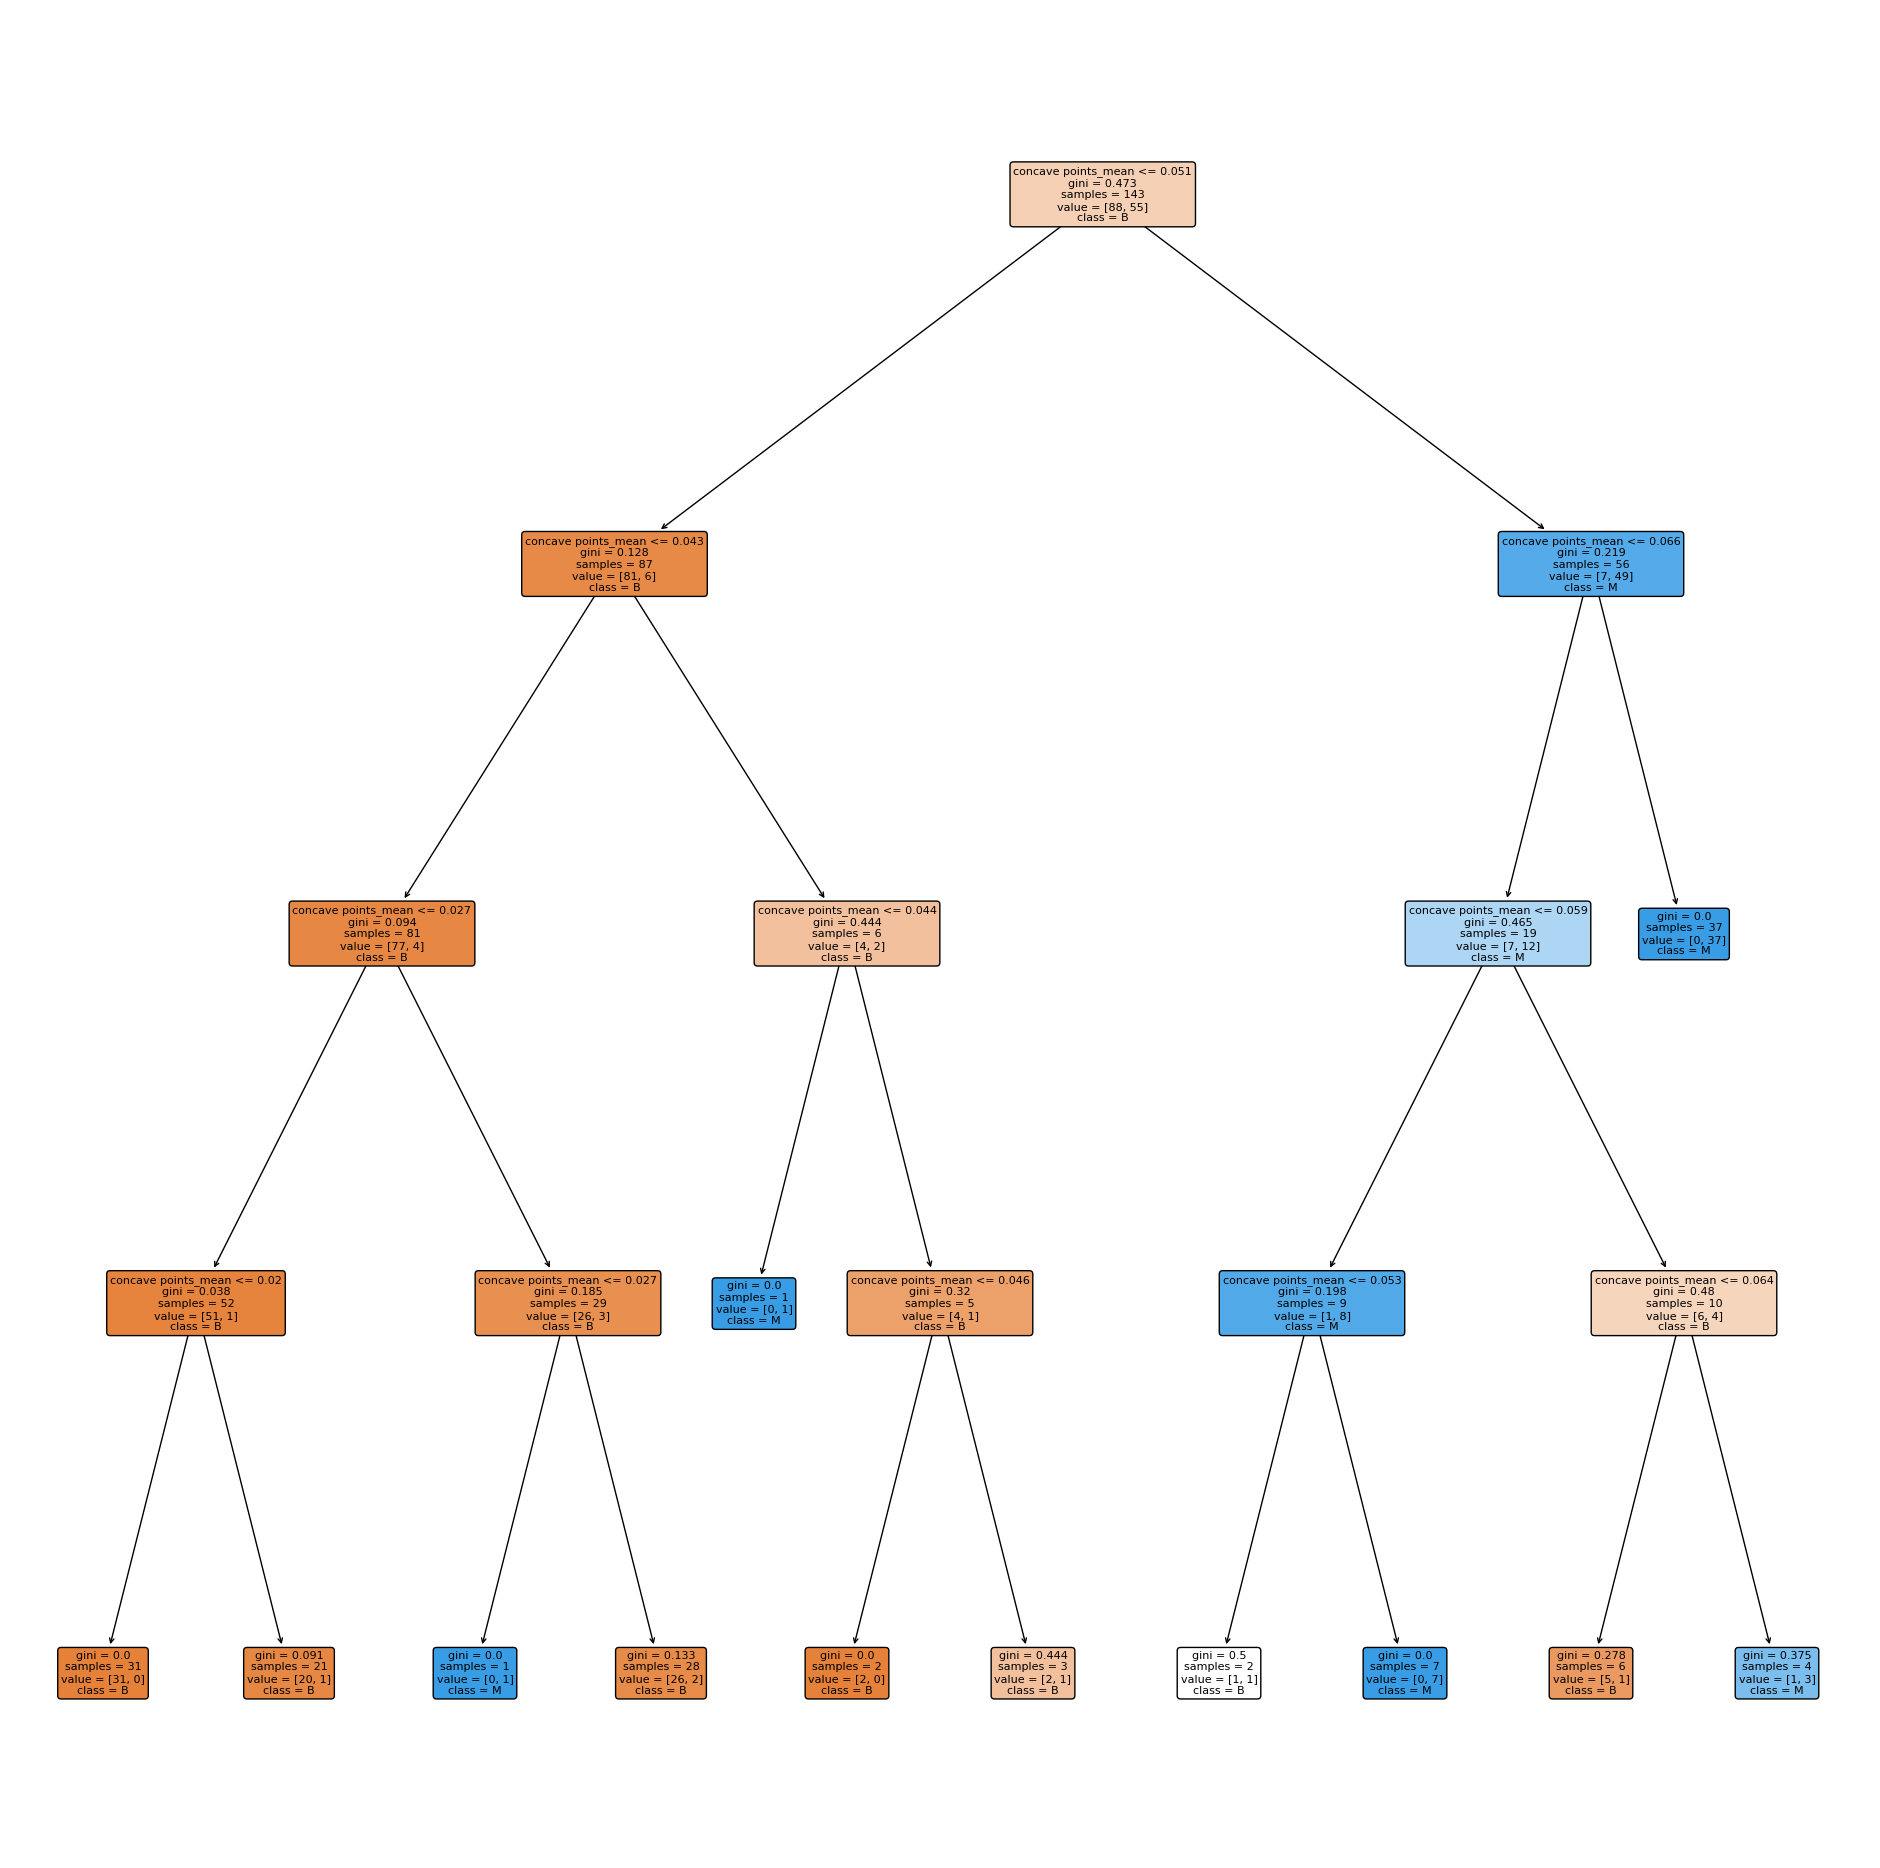

In [14]:
#Tree of the Test Set (Highest Mean)
dectree.fit(X_test.values.reshape(-1, 1), y_test)
f = plt.figure(figsize=(24, 24))
plot_tree(dectree,
          filled=True,
          rounded=True,
          feature_names=[highest_mean_classification_name],
          class_names=["B", "M"])
plt.show()

In [15]:
# The RandomForestClassifier is an ensemble learning method based on decision trees, where multiple decision trees are trained on different subsets of the training data and their predictions are combined to make the final classification. While the underlying base estimator in a RandomForestClassifier is a decision tree, the ensemble nature of the random forest often leads to improved performance compared to a single decision tree.

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    meanbreast[highest_mean_classification_name],
    diagnosis,
    test_size=0.25,
    random_state=1)
random_mean_train = RandomForestClassifier(n_estimators=100, random_state=1)
y_train = np.ravel(y_train)
random_mean_train.fit(X_train.values.reshape(-1, 1), y_train)
predictions = random_mean_train.predict(X_test.values.reshape(-1, 1))
accuracy = accuracy_score(y_test, predictions)
print('Accuracy of "{}" is: {:.5}'.format(highest_mean_classification_name,accuracy))

#We want to use randomforstclassifier because it is a more accurate and precise compared to just a singular decision tree.

Accuracy of "concave points_mean" is: 0.84615


In [16]:
# I want to ensure that the highest predictor remains the same variable
randomtree_mean_accuracy = []  # Create an array to store accuracy
random_mean_train = RandomForestClassifier(n_estimators=100, random_state=1)

for column in meanbreast:
    X_train, X_test, y_train, y_test = train_test_split(meanbreast[column], diagnosis, test_size=0.25, random_state=1)  #using a loop to calculate
    y_train = np.ravel(y_train)
    random_mean_train.fit(X_train.values.reshape(-1, 1), y_train)
    predictions = random_mean_train.predict(X_test.values.reshape(-1, 1))
    accuracy = accuracy_score(y_test, predictions)
    randomtree_mean_accuracy.append(accuracy)
    
#This cell is to compare the accuracy values previously. We can determine the highest accuracy.
highest_mean_accuracy = 0
highest_mean_accuracy_name = ""
for accuracy, column in zip(randomtree_mean_accuracy, meanbreast):  #to iterate through dectree_classification and meanbreast same time
    if highest_mean_accuracy < accuracy:
        highest_mean_accuracy = accuracy
        highest_mean_accuracy_name = column
        
        
print("The Highest accuracy of '{:.5}' in the random tree classifier is: \t {}".format(highest_mean_accuracy, highest_mean_accuracy_name))

The Highest accuracy of '0.84615' in the random tree classifier is: 	 concave points_mean


From here, we are able to see that the highest accuracy for both randomtreeclassifier and singular decision tree remains the same. Thus, "concave points_mean" remains the top predictor for  using the mean variables to deduce whether the tumor is cancerous

## Formatting worstbreast

The next few lines of codes we will figure out which is the best "worst" variable based on the classification accuracy to be used as a predictor for diagnosing "M" or "B"

After we have found the best "worst" variable, we will find the TPR and FPR rate to see if it is truly viable to be used as a predictor.

We can calculate using the same method used to calculate meanbreast, just changing the variable.


In [17]:
dectree_classification_worst = []  # Create an array to store classification of worstbreast
dectree_worst = DecisionTreeClassifier(max_depth=4)  #Create a 4-depth tree

for column in worstbreast:
    X_train, X_test, y_train, y_test = train_test_split(worstbreast[column], diagnosis, test_size=0.25, random_state=1)  #using a loop to calculate
    dectree_worst.fit(X_train.values.reshape(-1, 1), y_train)  #train the tree based on the split above
    classificiation_worst = dectree_worst.score(X_train.values.reshape(-1, 1), y_train)  #get the classification_worst accuracy.

    dectree_classification_worst.append(classificiation_worst)  #append each classificiation_worst to dectree_classification_worst

In [18]:
#This cell is to compare the classification_worst values previously. We can determine the highest and lowest classification accuracy.
highest_worst_classification = 0
lowest_worst_classification = 100
highest_worst_classification_name = ""
lowest_worst_classification_name = ""

for classification_worst, column in zip(dectree_classification_worst, worstbreast):  #to iterate through dectree_classification and meanbreast same time
    if highest_worst_classification < classification_worst:
        highest_worst_classification = classification_worst
        highest_worst_classification_name = column
    elif lowest_worst_classification > classification_worst:
        lowest_worst_classification = classification_worst
        lowest_worst_classification_name = column

In [19]:
#Print the highest/lowest clasification, and show which column it belongs to.
print("The Highest classification accuracy of '{:.5}' in the decision tree of depth 4 is: \t {}".format(highest_worst_classification, highest_worst_classification_name))
print("The Lowest classification accuracy of '{:.5}' in the decision tree of depth 4 is: \t {}".format(lowest_worst_classification, lowest_worst_classification_name))

The Highest classification accuracy of '0.9507' in the decision tree of depth 4 is: 	 perimeter_worst
The Lowest classification accuracy of '0.723' in the decision tree of depth 4 is: 	 fractal_dimension_worst


The TPR for the 'perimeter_worst' Train Set is: 	 0.94268
The FPR for the 'perimeter_worst' Train Set is: 	 0.04461

The TPR for the 'perimeter_worst' Test Set is: 	 1.00000
The FPR for the 'perimeter_worst' Test Set is: 	 1.00000



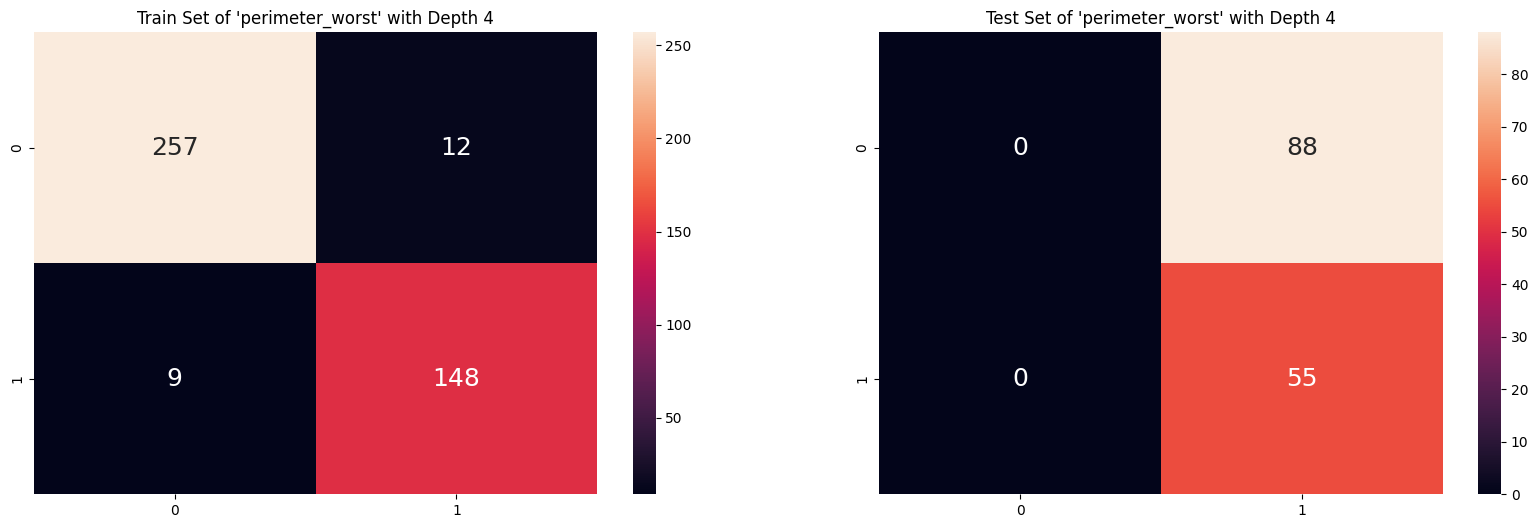

In [20]:
#this is to generate the heatmap/confusion matrix of the highest classification accuracy. We want to see the TPR/FPR

X_train, X_test, y_train, y_test = train_test_split(worstbreast[highest_worst_classification_name],diagnosis,test_size=0.25,random_state=1)

dectree_worst.fit(X_train.values.reshape(-1, 1), y_train)  # To get the Train Set
highest_worst_pred = dectree_worst.predict(X_train.values.reshape(-1, 1))
highest_worst_matrix = confusion_matrix(y_train, highest_worst_pred)
TP = highest_worst_matrix[1][1]
FN = highest_worst_matrix[1][0]
FP = highest_worst_matrix[0][1]
TN = highest_worst_matrix[0][0]
print("The TPR for the '{}' Train Set is: \t {:.5f}".format(highest_worst_classification_name, (TP / (TP + FN))))
print("The FPR for the '{}' Train Set is: \t {:.5f}\n".format(highest_worst_classification_name, (FP / (FP + TN))))

dectree_worst.fit(X_test.values.reshape(-1, 1), y_test)  # To get the Test Set
highest_worst_pred_train = dectree.predict(X_test.values.reshape(-1, 1))
highest_worst_train_matrix = confusion_matrix(y_test, highest_worst_pred_train)
TP = highest_worst_train_matrix[1][1]
FN = highest_worst_train_matrix[1][0]
FP = highest_worst_train_matrix[0][1]
TN = highest_worst_train_matrix[0][0]
print("The TPR for the '{}' Test Set is: \t {:.5f}".format(highest_worst_classification_name, (TP / (TP + FN))))
print("The FPR for the '{}' Test Set is: \t {:.5f}\n".format(highest_worst_classification_name, (FP / (FP + TN))))

f, axes = plt.subplots(1, 2, figsize=(20, 6))  # to generate the heatmap of the Test and Train Set
sb.heatmap(highest_worst_matrix,annot=True,fmt=".0f",annot_kws={"size": 18},ax=axes[0])
axes[0].set_title("Train Set of '{}' with Depth 4".format(highest_worst_classification_name))
sb.heatmap(highest_worst_train_matrix, annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title("Test Set of '{}' with Depth 4".format(highest_worst_classification_name))
plt.show()

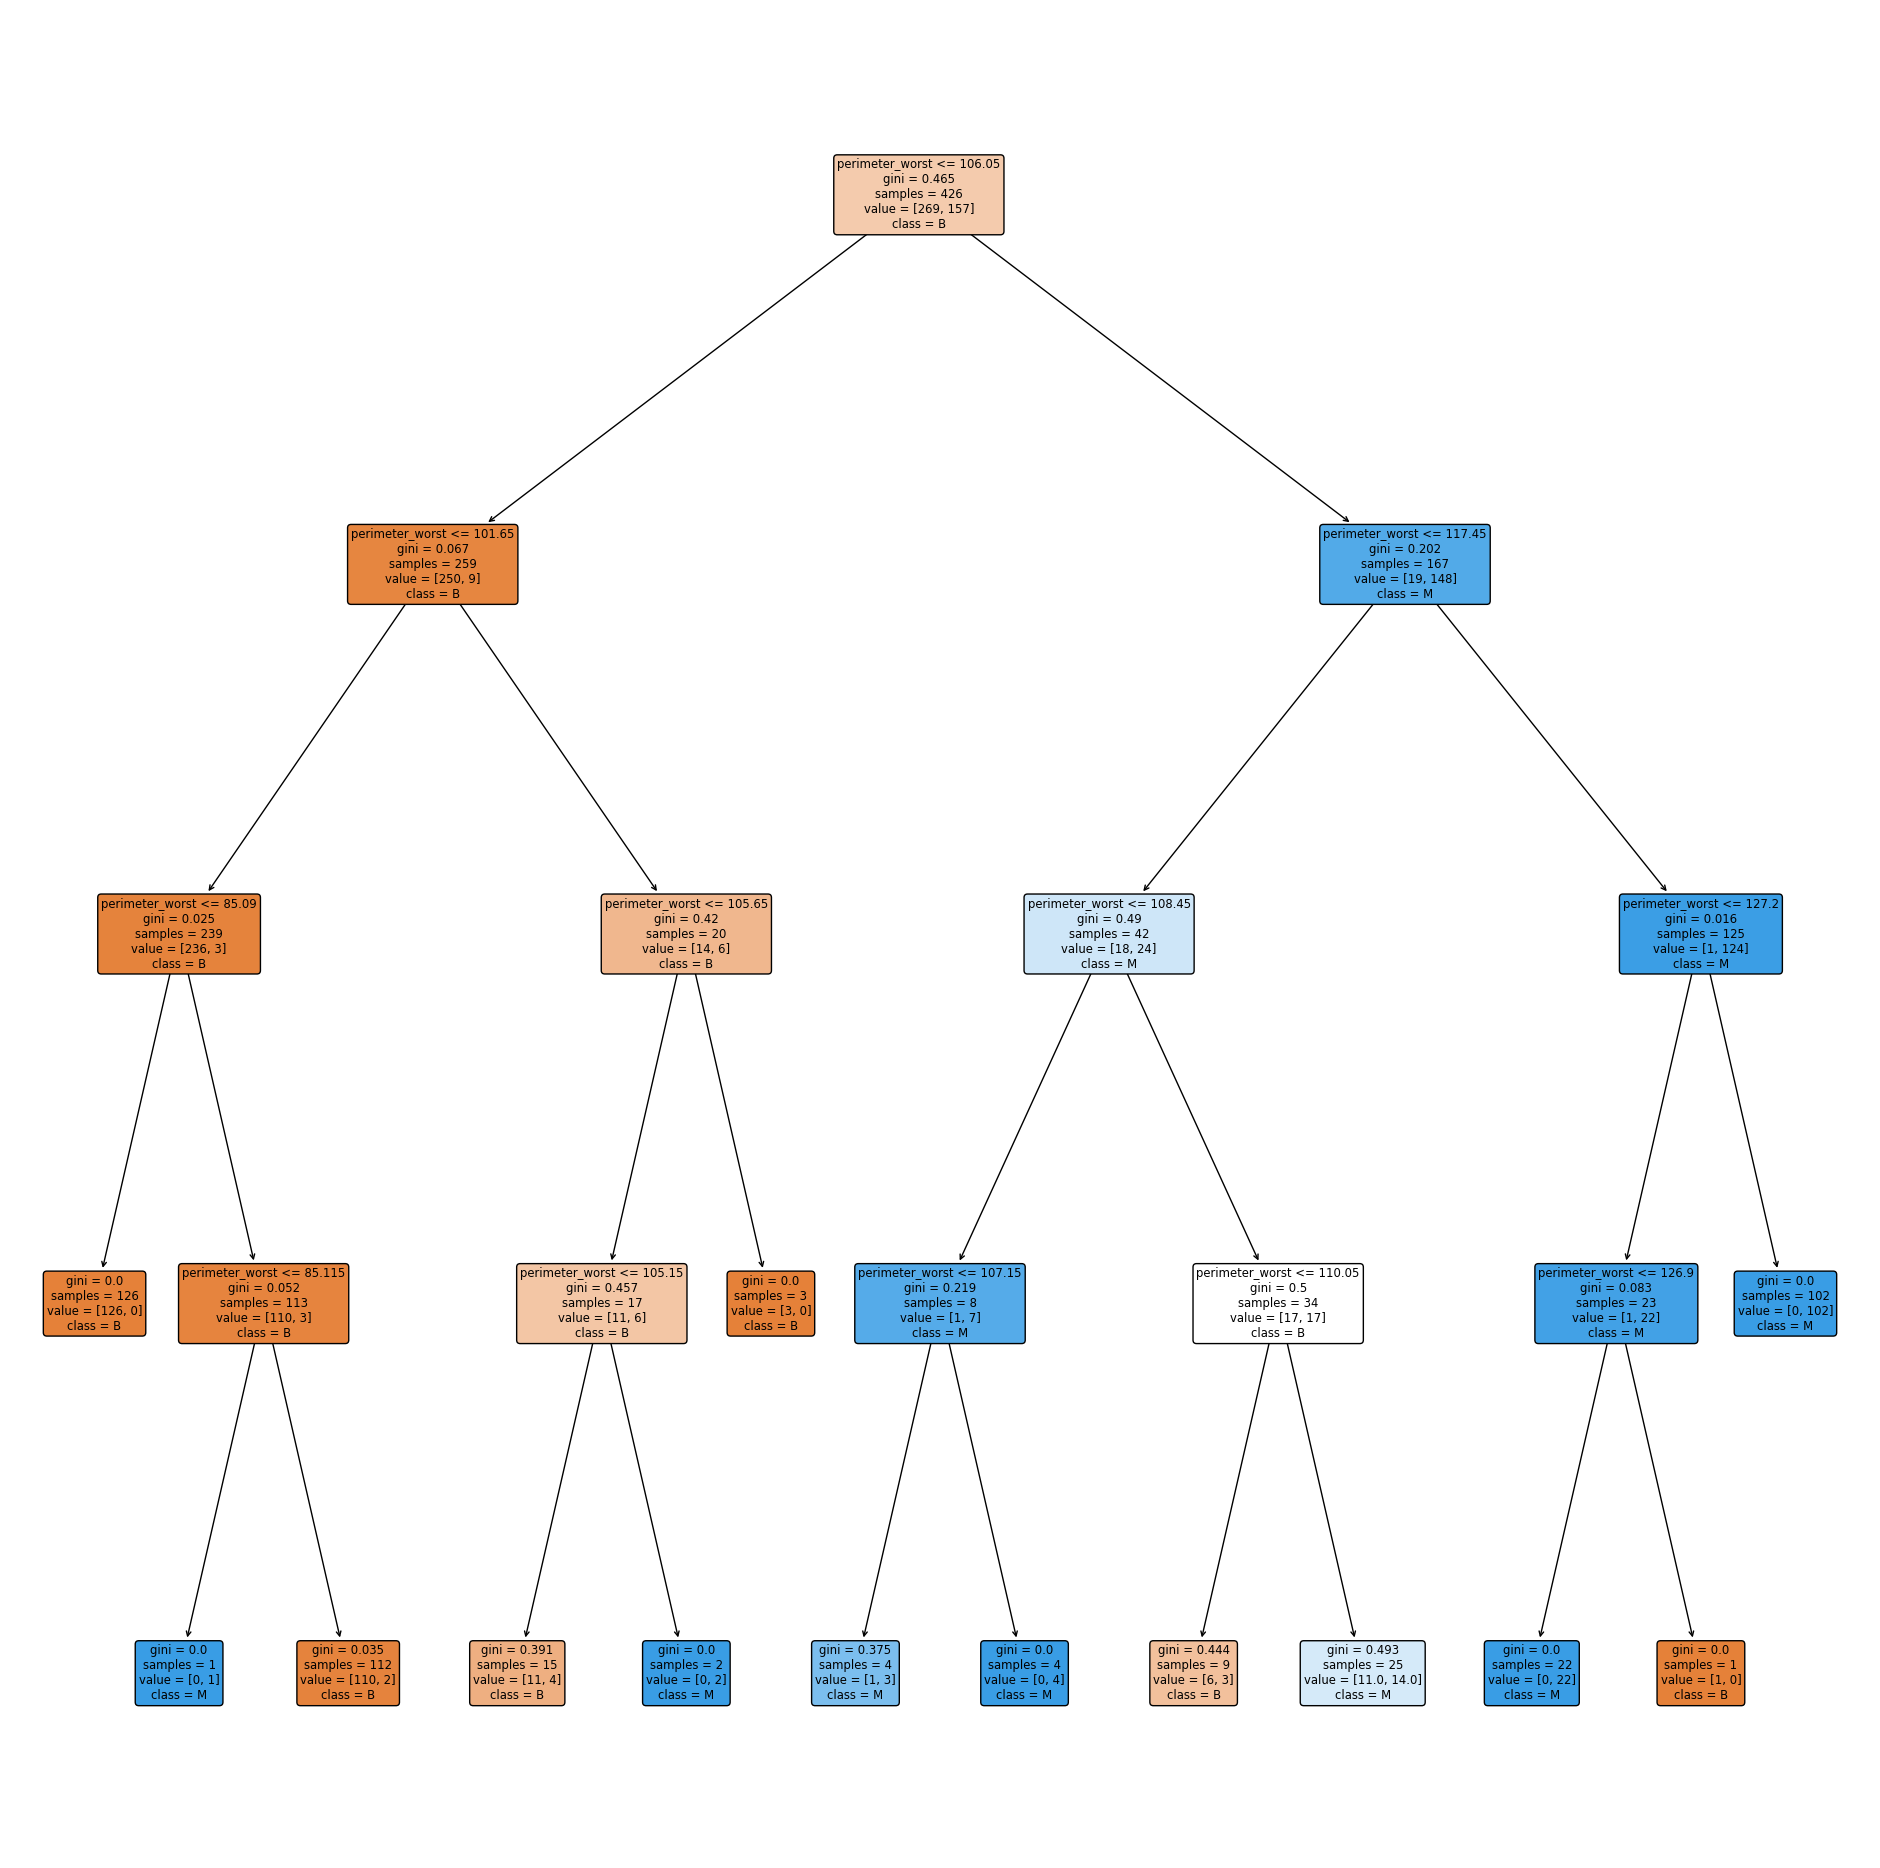

In [21]:
#Tree of the Train Set (Highest Worst)
dectree_worst.fit(X_train.values.reshape(-1, 1), y_train)
f = plt.figure(figsize=(24, 24))
plot_tree(dectree_worst,filled=True,rounded=True,feature_names=[highest_worst_classification_name], class_names=["B", "M"])
plt.show()

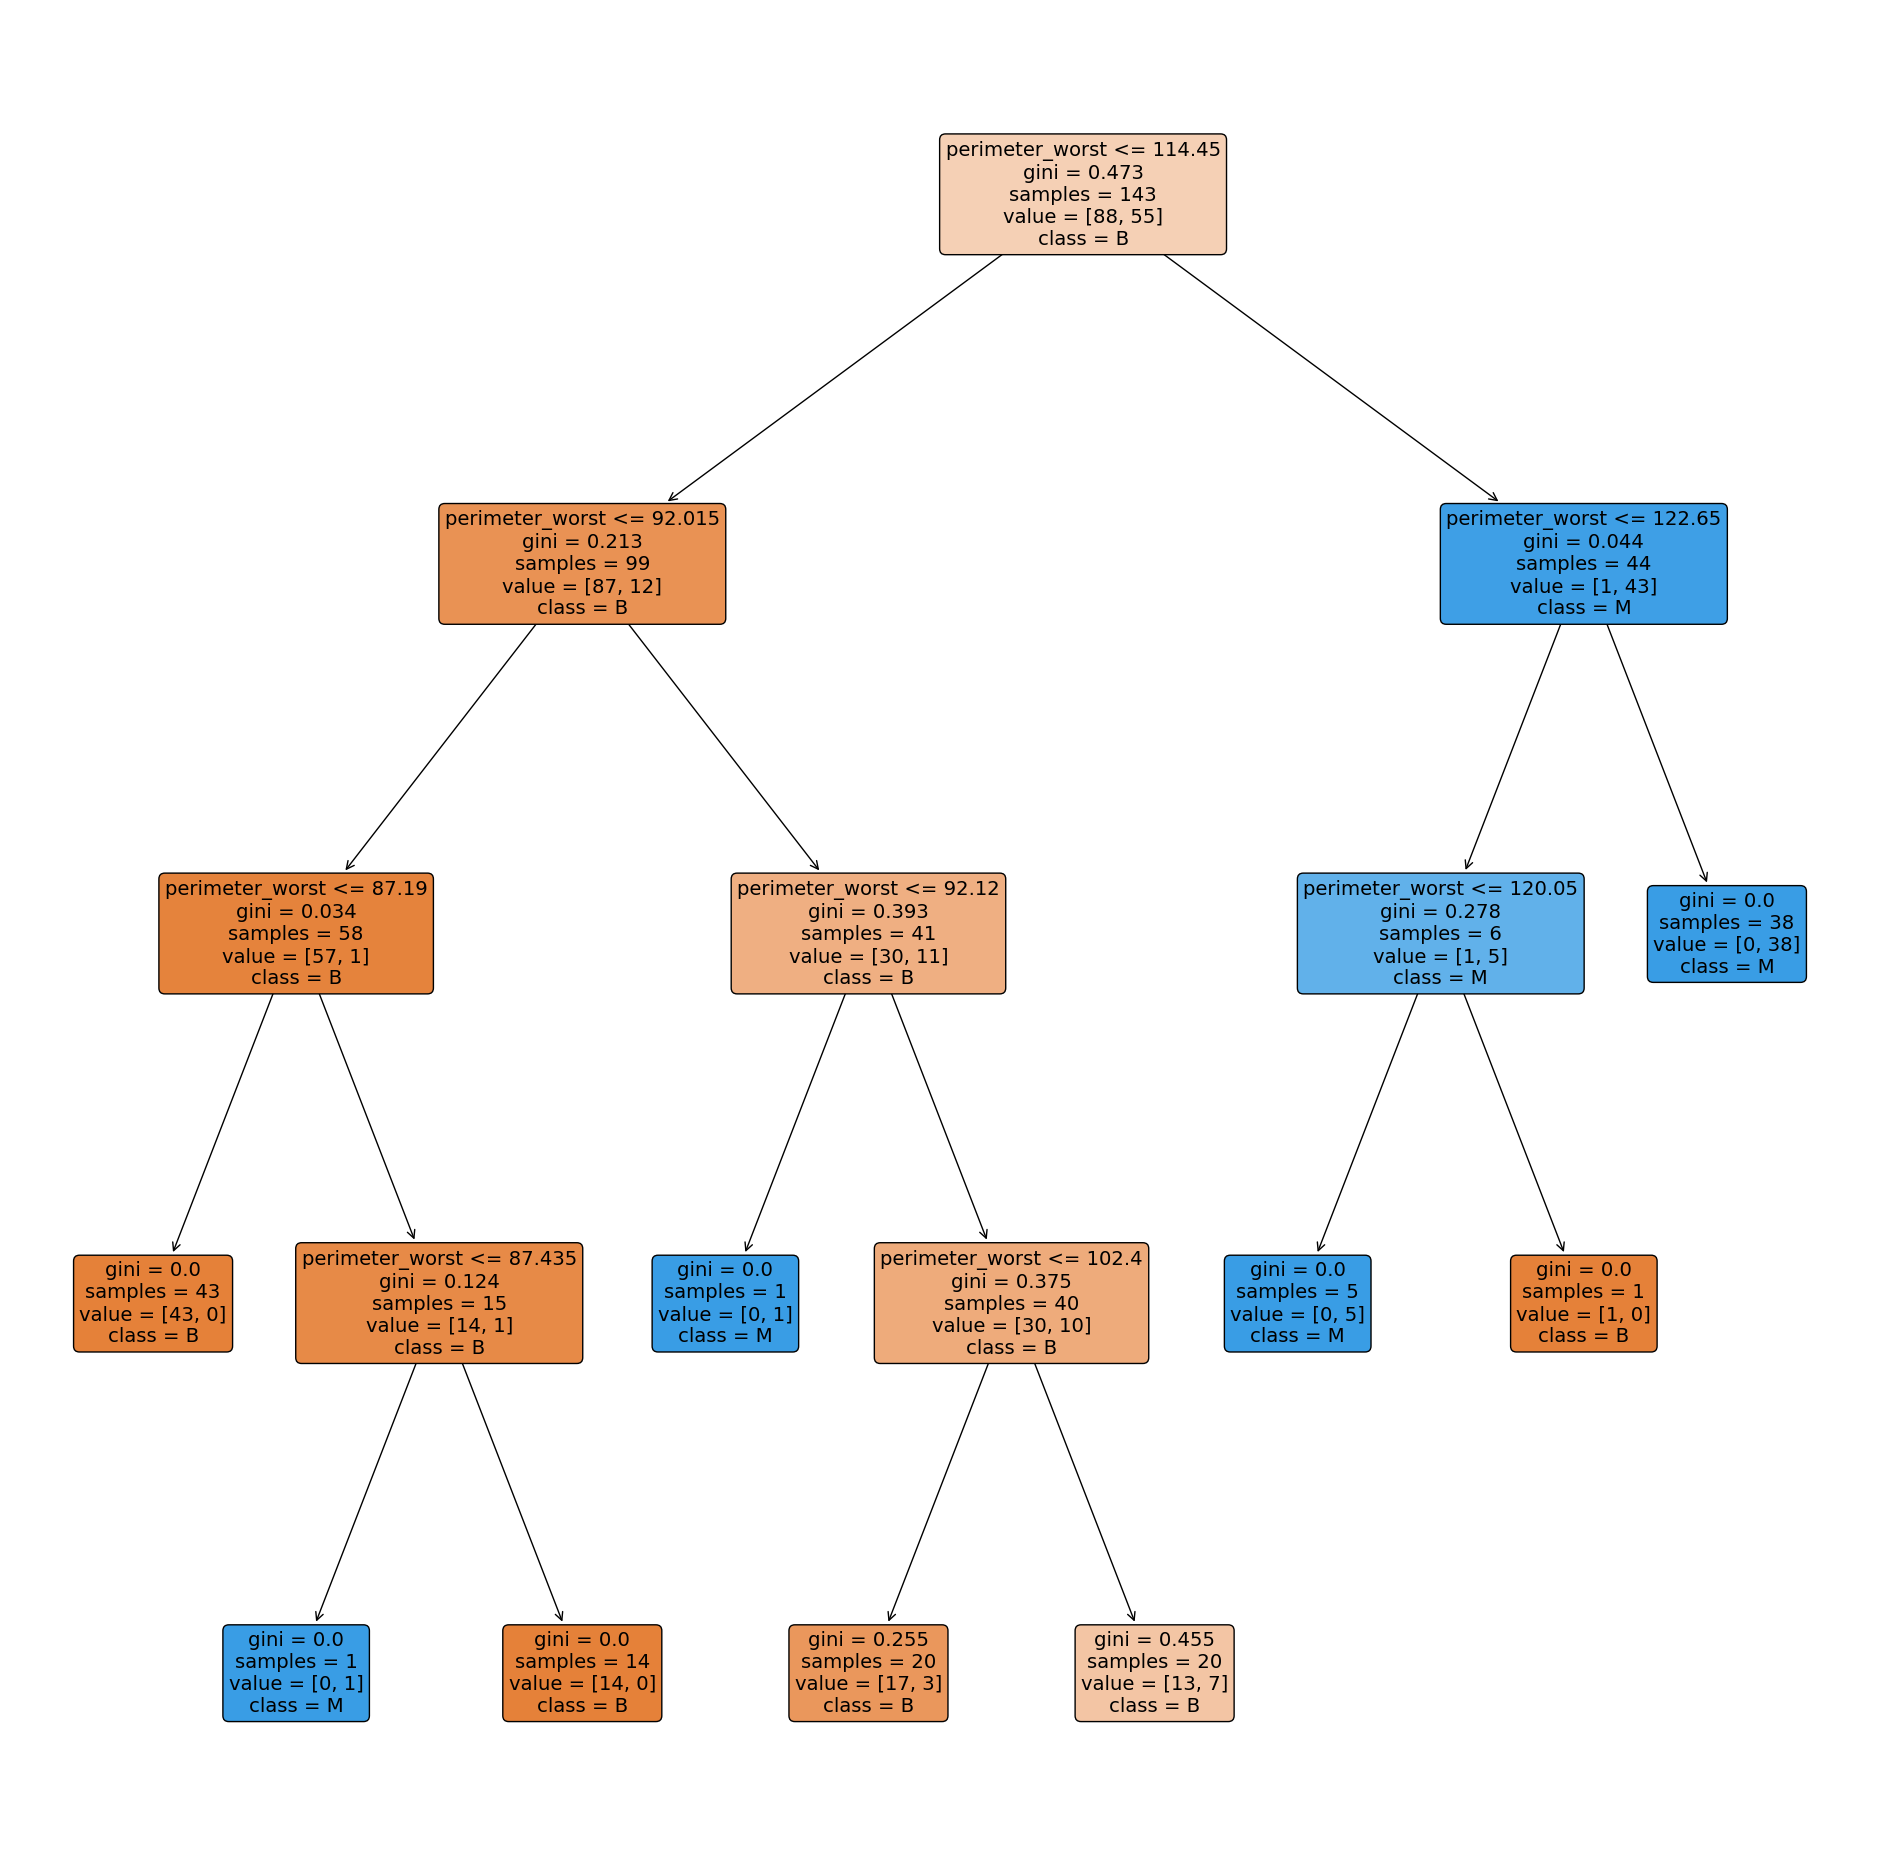

In [22]:
#Tree of the Test Set (Highest Worst)
dectree_worst.fit(X_test.values.reshape(-1, 1), y_test)
f = plt.figure(figsize=(24, 24))
plot_tree(dectree_worst,filled=True,rounded=True,feature_names=[highest_worst_classification_name],class_names=["B", "M"])
plt.show()

In [23]:
# The RandomForestClassifier is an ensemble learning method based on decision trees, where multiple decision trees are trained on different subsets of the training data and their predictions are combined to make the final classification. While the underlying base estimator in a RandomForestClassifier is a decision tree, the ensemble nature of the random forest often leads to improved performance compared to a single decision tree.
X_train, X_test, y_train, y_test = train_test_split(
    worstbreast[highest_worst_classification_name],
    diagnosis,
    test_size=0.25,
    random_state=1)
random_worst_train = RandomForestClassifier(n_estimators=100, random_state=1)
y_train = np.ravel(y_train)
random_worst_train.fit(X_train.values.reshape(-1, 1), y_train)
predictions = random_worst_train.predict(X_test.values.reshape(-1, 1))
accuracy = accuracy_score(y_test, predictions)
print('Accuracy of "{}" is: {:.5}'.format(highest_worst_classification_name,accuracy))

#We want to use randomforstclassifier because it is a more accurate and precise compared to just a singular decision tree.

Accuracy of "perimeter_worst" is: 0.86713


In [24]:
# I want to ensure that the highest predictor remains the same variable
randomtree_worst_accuracy = []  # Create an array to store accuracy
random_worst_train = RandomForestClassifier(n_estimators=100, random_state=1)

for column in worstbreast:
    X_train, X_test, y_train, y_test = train_test_split(worstbreast[column], diagnosis, test_size=0.25, random_state=1)  #using a loop to calculate
    y_train = np.ravel(y_train)
    random_worst_train.fit(X_train.values.reshape(-1, 1), y_train)
    predictions = random_worst_train.predict(X_test.values.reshape(-1, 1))
    accuracy = accuracy_score(y_test, predictions)
    randomtree_worst_accuracy.append(accuracy)
    
#This cell is to compare the accuracy values previously. We can determine the highest accuracy.
highest_worst_accuracy = 0
highest_worst_accuracy_name = ""
for accuracy, column in zip(randomtree_worst_accuracy, worstbreast):  #to iterate through dectree_classification and meanbreast same time
    if highest_worst_accuracy < accuracy:
        highest_worst_accuracy = accuracy
        highest_worst_accuracy_name = column
        
        
print("The Highest accuracy of '{:.5}' in the random tree classifier is: \t {}".format(highest_worst_accuracy, highest_worst_accuracy_name))

The Highest accuracy of '0.88112' in the random tree classifier is: 	 area_worst


We can see that for worstbreast, the highest accuracy is different when comparing the randomtreeclassifier and the singular decision tree. 

## What exactly are the list of predictors that are good?

We want to see if there are any common top predictors for both meanbreast and worstbreast. This is to make our data more precise by having two predictors with a high accuracy rate.

We want to use Random Tree Classifier instead of a singular decision tree because it is more accurate and precise

Note that when we compare the data, we will realise that: 

- For worstbreast, the best predictors are the perimeter\+area\+radius\+concavity\_points\+concavity. 
- For meanbreast, the best predictors are concave\_points\+perimeter\+concavity\+radius\+area

We will see that these are the top 5 predictors, and what we find most important for our data. In the event that the top predictor seems unreliable, we can use the second top predictor and cross-reference with the other top predictors to determine whether it is "B" or "M"



In [25]:
#Initialising variables to find the top 5 accuracy + column names

top_5_numbers_meanbreast = []
top_5_numbers_worstbreast = []
top_5_numbers_meanbreast_names=[]
top_5_numbers_worstbreast_names=[]
temp_meanbreast=[] #Placeholder for randomtree_mean_accuracy because we don't want the data to be lost in the loop
temp_worstbreast=[]#Placeholder for randomtree_worst_accuracy because we don't want the data to be lost in the loop

for accuracy_mean in randomtree_mean_accuracy: # Store randomtree_mean_accuracy into temp_meanbreast
    temp_meanbreast.append(accuracy_mean)

for accuracy_worst in randomtree_worst_accuracy: # Store randomtree_worst_accuracy into temp_worstbreast
    temp_worstbreast.append(accuracy_worst)

In [26]:
#using a loop to find top 5 accuracy + column names

for _ in range(5):
    max_num_mean = max(temp_meanbreast)  # Find the maximum number in the array
    top_5_numbers_meanbreast.append(max_num_mean)  # Add the maximum number to the top 5 list
    for accuracy_mean, column in zip(randomtree_mean_accuracy, meanbreast):  #to iterate through randomtree_mean_accuracy and meanbreast same time
        if max_num_mean == accuracy_mean:
            top_5_numbers_meanbreast_names.append(column) # Store the corresponding maximum number with the column heading
    temp_meanbreast.remove(max_num_mean)  # Remove the maximum number from the original array
    
    
    max_num_worst = max(temp_worstbreast)  # Find the maximum number in the array
    top_5_numbers_worstbreast.append(max_num_worst)  # Add the maximum number to the top 5 list
    for accuracy_worst, column in zip(randomtree_worst_accuracy, worstbreast):  #to iterate through randomtree_worst_accuracy and worstbreast same time
        if max_num_worst == accuracy_worst:
            top_5_numbers_worstbreast_names.append(column) # Store the corresponding maximum number with the column heading
    temp_worstbreast.remove(max_num_worst)  # Remove the maximum number from the original array
    

In [27]:
print("Top meanbreast predictors:")
for i, accuracy_mean, column in zip(range(1,6),top_5_numbers_meanbreast, top_5_numbers_meanbreast_names):
    print("{}: {:.5f} {}".format(i, accuracy_mean, column))
    
print("\nTop worstbreast predictors:")
for i, accuracy_worst, column in zip(range(1,6),top_5_numbers_worstbreast, top_5_numbers_worstbreast_names):
    print("{}: {:.5f} {}".format(i, accuracy_worst, column))

Top meanbreast predictors:
1: 0.84615 concave points_mean
2: 0.80420 concavity_mean
3: 0.78322 area_mean
4: 0.77622 perimeter_mean
5: 0.76923 radius_mean

Top worstbreast predictors:
1: 0.88112 area_worst
2: 0.86713 perimeter_worst
3: 0.86014 concave points_worst
4: 0.85315 radius_worst
5: 0.78322 concavity_worst


By using a simple calculation of \(meanbreast\+worstbreast\)/2, we can see the overall ranking of the top 5 predictors.

We realised that the top 5 predictors are the same, so we can make it simple and remove the suffix "_worst" and "_mean" to compare the headings for automated calculation.



## Obtain the overall top 5 predictors



In [28]:
#removing the suffix "_mean" and "_worst"

for i in range(0,5):
    top_5_numbers_meanbreast_names[i]=top_5_numbers_meanbreast_names[i].replace("_mean", "")
    top_5_numbers_worstbreast_names[i]=top_5_numbers_worstbreast_names[i].replace("_worst", "")

In [29]:
# We get the overall classification accuracy and the column name

overallclassification=[]
overallclassification_name=[]

for classification, column in zip(top_5_numbers_meanbreast, top_5_numbers_meanbreast_names):
    for classification_worst, column_worst in zip(top_5_numbers_worstbreast, top_5_numbers_worstbreast_names):
        if column==column_worst:
            overallclassification_name.append(column)
            overallclassification.append((classification+classification_worst)/2)

In [30]:
#We are trying to use the two variables below to store the top 5 overall classification accuracy and column name.

top_5_overall=[]
top_5_overall_name=[]

for _ in range(5):
    max_num_average = max(overallclassification)  # Find the maximum number in the array
    max_index = overallclassification.index(max_num_average) # Find the index of the maximum number in the array
    top_5_overall.append(max_num_average)  # Add the maximum number to the top 5 list
    top_5_overall_name.append(overallclassification_name[max_index]) #Use the index we found to append to the name.
    overallclassification.remove(max_num_average)  # Remove the maximum number from the original array
    overallclassification_name.remove(overallclassification_name[max_index])

In [31]:
print("Top overall predictors:")
for i, classification, column in zip(range(1,6),top_5_overall, top_5_overall_name):
    print("{}: {:.5f} {}".format(i, classification, column))

Top overall predictors:
1: 0.85315 concave points
2: 0.83217 area
3: 0.82168 perimeter
4: 0.81119 radius
5: 0.79371 concavity


In [32]:
#new df for top predictors found
topPred = pd.DataFrame(original[['concave points_mean', 'perimeter_mean', 'area_mean', 'radius_mean', 'concavity_mean',
                               'concave points_worst', 'perimeter_worst', 'area_worst', 'radius_worst', 'concavity_worst',
                               'diagnosis'
                                ]])

## Relationship between each top predictor against diagnosis

By plotting the boxplot, histogram, and violin plot, we are able to see the relationship between each top predictor against the diagnosis \('M' or 'B'\)



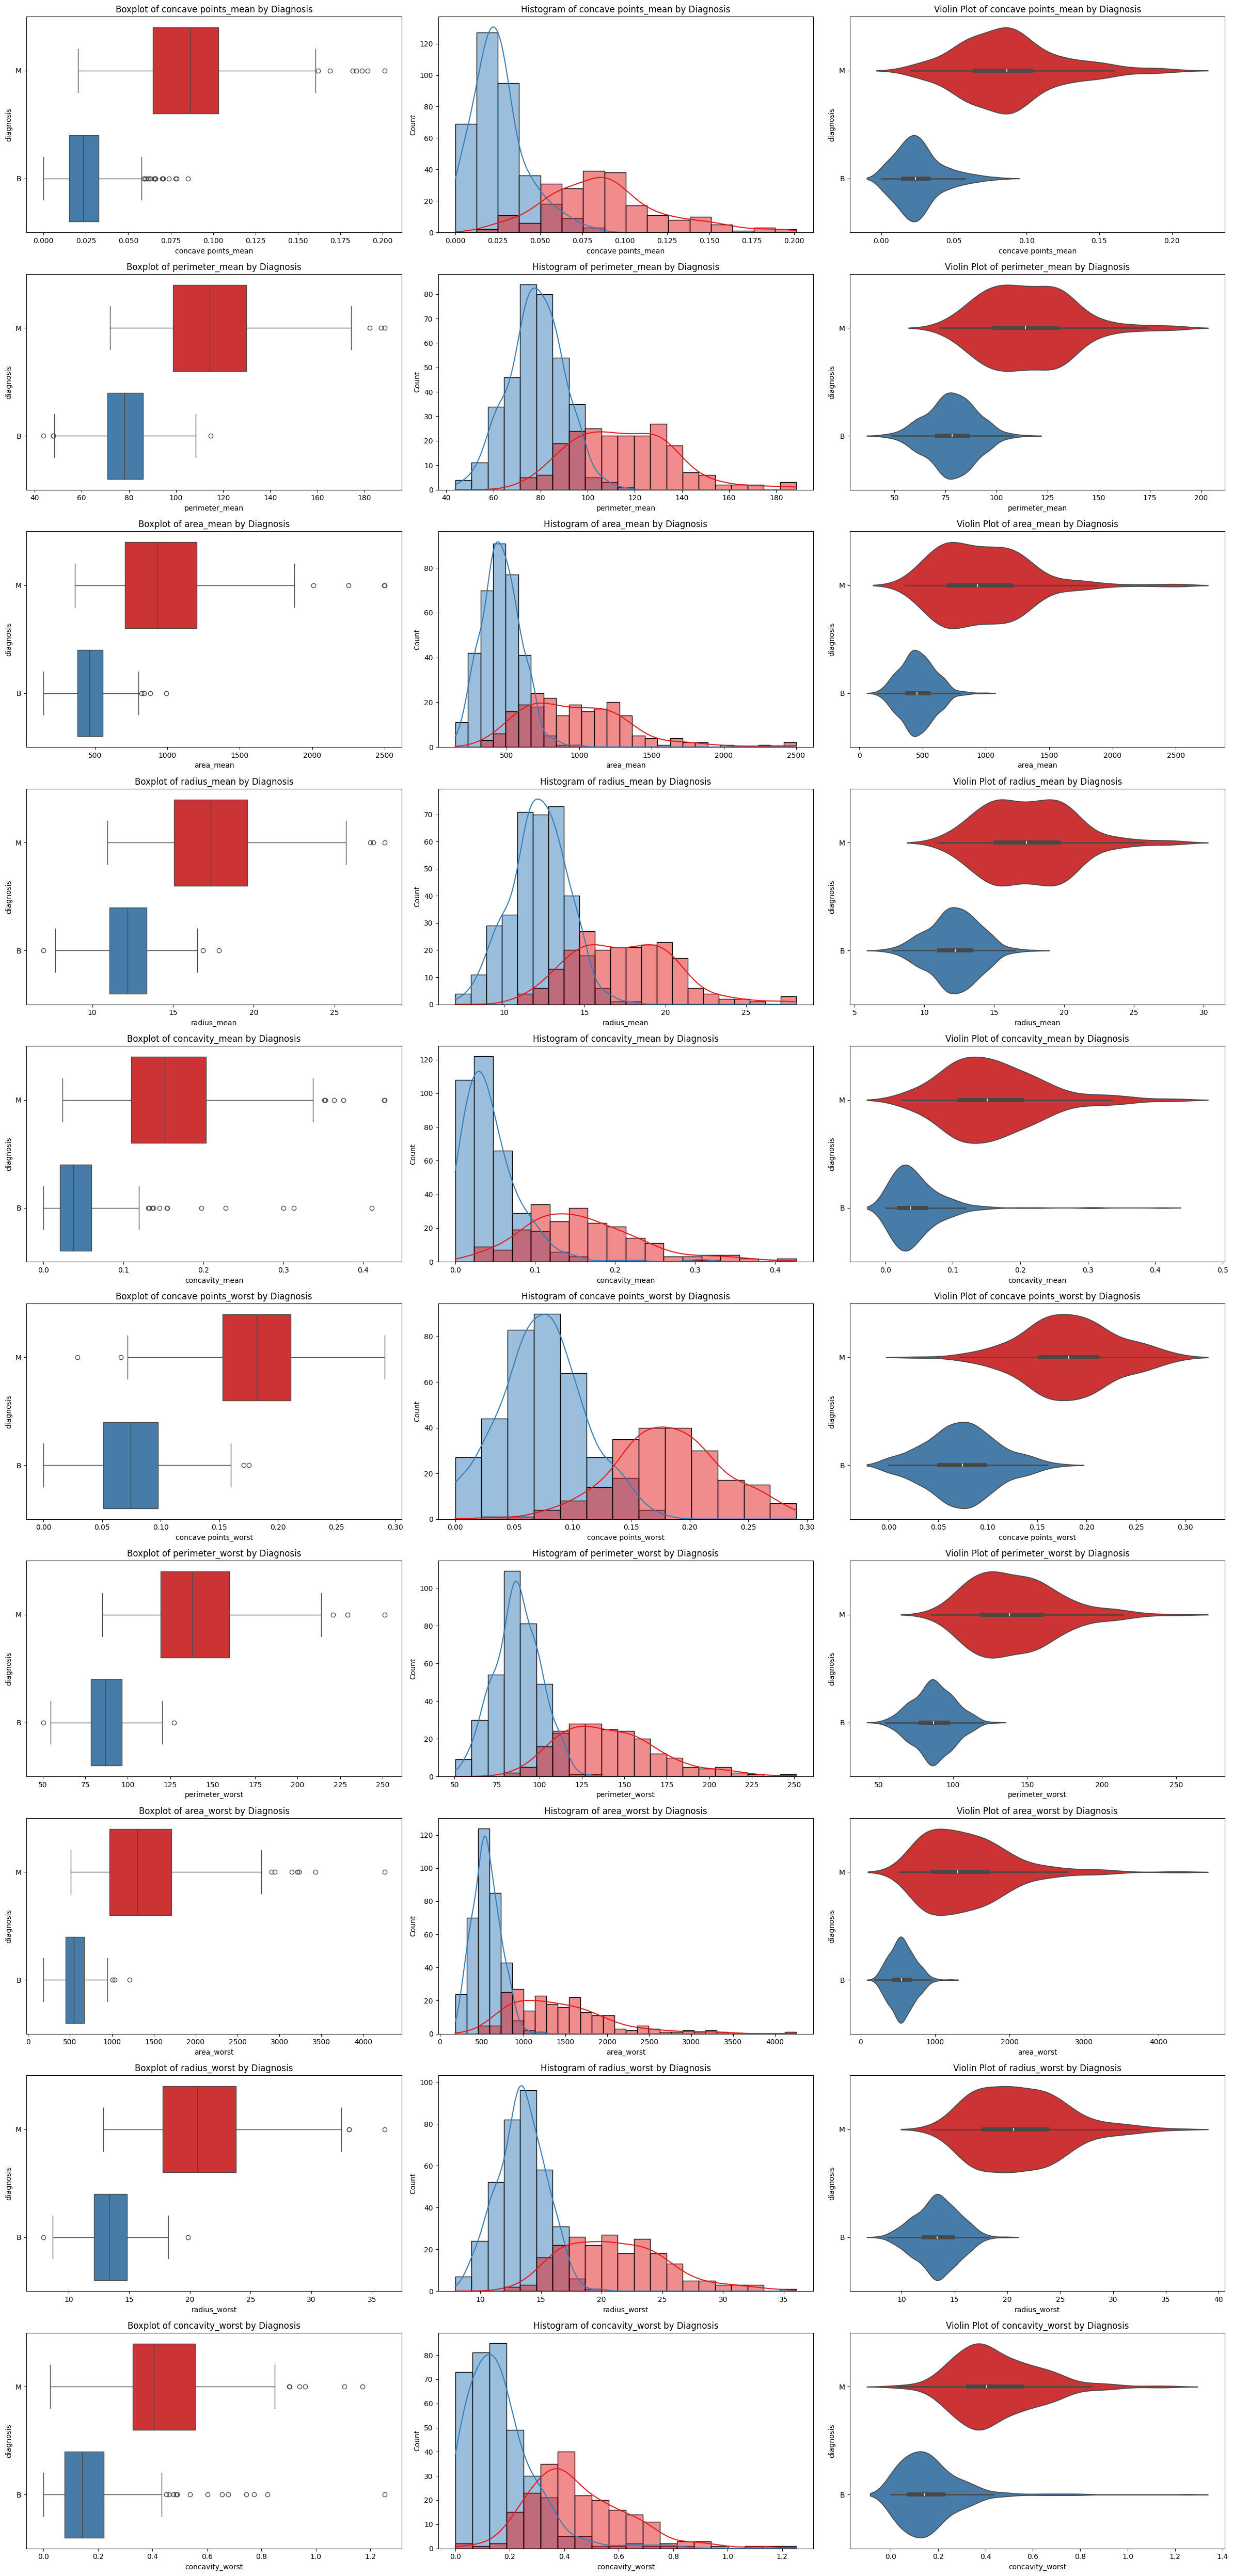

In [33]:
# Show relation between each top predictor against diagnosis

f, axes = plt.subplots(10, 3, figsize=(24, 50))

count = 0

for var in topPred.columns:
    if var != 'diagnosis':
        # Boxplot comparing the numerical variable against the boolean variable 'diagnosis'
        sb.boxplot(data=topPred, y='diagnosis', x=var, ax=axes[count, 0], hue='diagnosis', legend=False, palette="Set1")
        axes[count, 0].set_title(f'Boxplot of {var} by Diagnosis')
        
        # Histogram of the numerical variable separated by the boolean variable 'diagnosis'
        sb.histplot(data=topPred, x=var, hue='diagnosis', ax=axes[count, 1], kde=True, legend=False, palette="Set1")
        axes[count, 1].set_title(f'Histogram of {var} by Diagnosis')
        
        # Violin plot comparing the numerical variable against the boolean variable 'diagnosis'
        sb.violinplot(data=topPred, y='diagnosis', x=var, ax=axes[count, 2], hue='diagnosis', legend=False, palette="Set1")
        axes[count, 2].set_title(f'Violin Plot of {var} by Diagnosis')
        
        count += 1

plt.tight_layout()
plt.show()

From all these graph, we are indeed see that there is a strong relationship between each parameters in finding whether the breast tumor is malignant \('M'\) or benign \('B'\) 


## To determine what affects the survivability rate

We import and explore "death" and "recovered"


In [34]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

deathurl = 'https://raw.githubusercontent.com/edmundyoyo/SC1015_MiniProj/main/death.csv'
recoveredurl = 'https://raw.githubusercontent.com/edmundyoyo/SC1015_MiniProj/main/recovered.csv'
death = pd.read_csv(deathurl)
recovered = pd.read_csv(recoveredurl)

In [35]:
death.head()

patient_id  gender   education  treatment_data  id_healthcenter  \
0  111036008041        0          4            2019       1110000256   
1  111035996130        0          6            2019       1110000316   
2  111035971333        0          5            2019       1110000288   
3  111036018485        0          5            2019       1110000042   
4  111035985474        0          1            2019       1110000116   

   id_treatment_region  hereditary_history birth_date  age  weight  ...  \
0           1110000329                   1       1989   30      69  ...   
1           1110000331                   0       1989   30      71  ...   
2           1110000330                   0       1989   30      74  ...   
3           1110000329                   1       1989   30      75  ...   
4           1110000330                   0       2009   10      70  ...   

   taking_gallbladder_disease_medicine  smoking  alcohol  breast_pain  \
0                                    1        0        0            1   
1                                    1        0        1            0   
2                                    0        0        0            1   
3                                    1        1        0            0   
4                                    0        0        0            0   

   radiation_history  Birth_control(Contraception)  \nmenstrual_age  \
0                  1                             1                1   
1                  0                             0                2   
2                  1                             0                1   
3                  0                             0                2   
4                  0                             0                0   

   \nmenopausal_age  \nBenign_malignant_cancer  condition  
0               0.0                          1      death  
1               0.0                          0      death  
2               0.0                          1      death  
3               0.0                          0      death  
4               0.0                          0      death  

[5 rows x 30 columns]

In [36]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           598 non-null    int64  
 1   gender                               598 non-null    int64  
 2   education                            598 non-null    int64  
 3   treatment_data                       598 non-null    int64  
 4   id_healthcenter                      598 non-null    int64  
 5   id_treatment_region                  598 non-null    int64  
 6   hereditary_history                   598 non-null    int64  
 7   birth_date                           598 non-null    object 
 8   age                                  598 non-null    int64  
 9   weight                               598 non-null    int64  
 10  thickness_tumor                      598 non-null    float64
 11  marital_status                  

In [37]:
recovered.head()

patient_id  gender   education  treatment_data  id_healthcenter  \
0  111038138356        0          3            2019       1110000181   
1  111038160121        0          4            2019       1110000251   
2  111038126993        0          5            2019       1110000167   
3  111038163257        0          0            2019       1110000317   
4  111038136311        0          3            2019       1110000108   

   id_treatment_region  hereditary_history  birth_date  age  weight  ...  \
0           1110000329                   0        1990   29      70  ...   
1           1110000331                   1        1989   30      78  ...   
2           1110000330                   0        1991   28      80  ...   
3           1110000330                   1        1944   75      85  ...   
4           1110000329                   0        1980   39      86  ...   

   taking_gallbladder_disease_medicine  smoking  alcohol  breast_pain  \
0                                    1        0        0            1   
1                                    0        0        0            1   
2                                    1        0        0            0   
3                                    0        1        1            0   
4                                    1        0        1            1   

   radiation_history  Birth_control(Contraception)  \nmenstrual_age  \
0                  0                             0                2   
1                  0                             1                2   
2                  1                             0                1   
3                  0                             1                2   
4                  0                             1                1   

   \nmenopausal_age  \nBenign_malignant_cancer  condition  
0                 0                          1  recovered  
1                 0                          0  recovered  
2                 0                          0  recovered  
3                 2                          1  recovered  
4                 0                          0  recovered  

[5 rows x 30 columns]

In [38]:
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           186 non-null    int64  
 1   gender                               186 non-null    int64  
 2   education                            186 non-null    int64  
 3   treatment_data                       186 non-null    int64  
 4   id_healthcenter                      186 non-null    int64  
 5   id_treatment_region                  186 non-null    int64  
 6   hereditary_history                   186 non-null    int64  
 7   birth_date                           186 non-null    int64  
 8   age                                  186 non-null    int64  
 9   weight                               186 non-null    int64  
 10  thickness_tumor                      186 non-null    float64
 11  marital_status                  

Since both "death" and "recovered" datasets have the same columns, we will combine them into one dataset named "survival"


## Combine datasets "death" and "recovered" into one dataset "survival"



In [39]:
survival = pd.concat([death, recovered], ignore_index=True)
d_rows, d_cols = death.shape
r_rows, r_cols = recovered.shape
n_rows, n_cols = survival.shape
print(f"The dataset now has {n_rows:,} rows and {n_cols:,} columns (a combination of {d_rows:,} rows from 'death' dataset and {r_rows:,} rows from 'recovered' dataset)")

The dataset now has 784 rows and 30 columns (a combination of 598 rows from 'death' dataset and 186 rows from 'recovered' dataset)


In [40]:
survival.head()

patient_id  gender   education  treatment_data  id_healthcenter  \
0  111036008041        0          4            2019       1110000256   
1  111035996130        0          6            2019       1110000316   
2  111035971333        0          5            2019       1110000288   
3  111036018485        0          5            2019       1110000042   
4  111035985474        0          1            2019       1110000116   

   id_treatment_region  hereditary_history birth_date  age  weight  ...  \
0           1110000329                   1       1989   30      69  ...   
1           1110000331                   0       1989   30      71  ...   
2           1110000330                   0       1989   30      74  ...   
3           1110000329                   1       1989   30      75  ...   
4           1110000330                   0       2009   10      70  ...   

   taking_gallbladder_disease_medicine  smoking  alcohol  breast_pain  \
0                                    1        0        0            1   
1                                    1        0        1            0   
2                                    0        0        0            1   
3                                    1        1        0            0   
4                                    0        0        0            0   

   radiation_history  Birth_control(Contraception)  \nmenstrual_age  \
0                  1                             1                1   
1                  0                             0                2   
2                  1                             0                1   
3                  0                             0                2   
4                  0                             0                0   

   \nmenopausal_age  \nBenign_malignant_cancer  condition  
0               0.0                          1      death  
1               0.0                          0      death  
2               0.0                          1      death  
3               0.0                          0      death  
4               0.0                          0      death  

[5 rows x 30 columns]

## Cleaning of dataset "survival"

we removed any random empty spaces and indentation, unnecessary parameters and focus only on important variable of a parameter



In [41]:
# Create a dictionary to map the original column names without any random empty spaces and '\n'
column_mapping = {col: col.replace(' ', '').replace('\n', '') for col in survival.columns}

# Rename the columns using the dictionary
survival = survival.rename(columns=column_mapping)

#read only the female data since our dataset "original" is all females only
survival = survival[survival["gender"] == 0]

#read only the malignant data
survival = survival[survival["Benign_malignant_cancer"] == 1]

survival.head()

patient_id  gender  education  treatment_data  id_healthcenter  \
0  111036008041       0          4            2019       1110000256   
2  111035971333       0          5            2019       1110000288   
5  111035903616       0          3            2019       1110000179   
6  111036003507       0          4            2019       1110000148   
8  111035938594       0          4            2019       1110000282   

   id_treatment_region  hereditary_history birth_date  age  weight  ...  \
0           1110000329                   1       1989   30      69  ...   
2           1110000330                   0       1989   30      74  ...   
5           1110000329                   1       1989   30      79  ...   
6           1110000329                   1       1990   29      96  ...   
8           1110000329                   1       1990   29      89  ...   

   taking_gallbladder_disease_medicine  smoking  alcohol  breast_pain  \
0                                    1        0        0            1   
2                                    0        0        0            1   
5                                    1        0        1            1   
6                                    0        0        0            1   
8                                    1        0        0            1   

   radiation_history  Birth_control(Contraception)  menstrual_age  \
0                  1                             1              1   
2                  1                             0              1   
5                  1                             1              1   
6                  1                             0              2   
8                  1                             0              2   

   menopausal_age  Benign_malignant_cancer  condition  
0             0.0                        1      death  
2             0.0                        1      death  
5             0.0                        1      death  
6             0.0                        1      death  
8             0.0                        1      death  

[5 rows x 30 columns]

### One\-hot encoding for the 'condition' of patient

we converted the “condition” from “death” to “1”, and “recovered” to “0”. This is so that it can be fed into machine learning algorithms to improve prediction accuracy. 


In [42]:
#new data without variables that is not important to our problem
survival_clean = pd.DataFrame(survival[['hereditary_history', 'age', 'weight', 'thickness_tumor', 'pregnency_experience', 'giving_birth', 'age_FirstGivingBirth', 'abortion', 'blood', 'taking_heartMedicine', 'taking_blood_pressure_medicine', 'taking_gallbladder_disease_medicine', 'smoking', 'alcohol', 'breast_pain', 'radiation_history', 'Birth_control(Contraception)', 'menstrual_age', 'menopausal_age', 'condition']])

# Change 'condition' to 'int64' where 'death' = 1 and 'recovered' = 0
survival_clean['condition'] = survival_clean['condition'].apply(lambda val: 1 if val == 'death' else 0)
survival_clean['condition'].unique()

array([1, 0], dtype=int64)

In [43]:
survival_clean.head(1000)

hereditary_history  age  weight  thickness_tumor  pregnency_experience  \
0                     1   30      69              0.9                     0   
2                     0   30      74              0.9                     0   
5                     1   30      79              0.7                     0   
6                     1   29      96              0.1                     0   
8                     1   29      89              0.7                     0   
..                  ...  ...     ...              ...                   ...   
735                   1   61      75              0.7                     1   
737                   1   30      96              0.8                     1   
738                   1   30      96              0.6                     1   
740                   1   43      79              0.6                     1   
741                   0   16      79              0.5                     0   

     giving_birth  age_FirstGivingBirth  abortion  blood  \
0               0                     0         0      4   
2               0                     0         1      4   
5               0                     0         0      6   
6               0                     0         0      4   
8               0                     0         0      1   
..            ...                   ...       ...    ...   
735             3                     1         0      3   
737             1                     1         0      7   
738             2                     2         0      4   
740             2                     2         0      7   
741             0                     0         0      3   

     taking_heartMedicine  taking_blood_pressure_medicine  \
0                       0                               1   
2                       1                               1   
5                       1                               1   
6                       1                               1   
8                       1                               1   
..                    ...                             ...   
735                     1                               0   
737                     1                               1   
738                     0                               1   
740                     1                               0   
741                     1                               1   

     taking_gallbladder_disease_medicine  smoking  alcohol  breast_pain  \
0                                      1        0        0            1   
2                                      0        0        0            1   
5                                      1        0        1            1   
6                                      0        0        0            1   
8                                      1        0        0            1   
..                                   ...      ...      ...          ...   
735                                    0        1        0            1   
737                                    0        0        0            1   
738                                    1        0        0            0   
740                                    0        0        1            0   
741                                    0        0        0            0   

     radiation_history  Birth_control(Contraception)  menstrual_age  \
0                    1                             1              1   
2                    1                             0              1   
5                    1                             1              1   
6                    1                             0              2   
8                    1                             0              2   
..                 ...                           ...            ...   
735                  0                             0              2   
737                  0                             1              1   
738                  1                             1          

In [44]:
for column in survival_clean:
    print(survival_clean[column].value_counts())

hereditary_history
1    218
0    168
2      2
Name: count, dtype: int64
age
33    26
31    21
29    20
34    20
32    19
      ..
46     1
6      1
62     1
13     1
64     1
Name: count, Length: 64, dtype: int64
weight
96     48
85     35
75     32
65     28
89     25
86     22
76     19
79     16
74     16
83     12
78     12
63     11
69     10
91     10
84      9
73      9
20      9
56      8
45      7
15      6
71      4
25      4
70      3
6       2
81      2
100     2
93      2
55      2
26      2
62      2
30      2
98      2
94      2
61      2
12      2
22      1
23      1
39      1
82      1
52      1
92      1
36      1
72      1
88      1
Name: count, dtype: int64
thickness_tumor
0.80    66
0.60    53
0.90    51
0.70    49
0.30    37
0.10    36
0.40    31
0.50    27
0.20    26
0.96     2
1.10     2
0.01     2
0.15     2
1.30     1
1.20     1
0.47     1
0.85     1
Name: count, dtype: int64
pregnency_experience
1    287
0    101
Name: count, dtype: int64
giving_birth
1    17

## Imputation on "survival" dataset

We noticed that there is an outlier in the 'blood', 'breast\_pain' and 'radiation\_history', we went on to do imputation



In [45]:
print("blood")
print("Before: ", survival_clean['blood'].unique())
survival_clean['blood'] = survival_clean['blood'].replace(44, 0)
print("After: ", survival_clean['blood'].unique())
print()
print("breast_pain")
print("Before: ", survival_clean['breast_pain'].unique())
survival_clean['breast_pain'] = survival_clean['breast_pain'].replace(11, 1)
print("After: ", survival_clean['breast_pain'].unique())
print()
print("radiation_history")
print("Before: ", survival_clean['radiation_history'].unique())
survival_clean['radiation_history'] = survival_clean['breast_pain'].replace(11, 0)
print("After: ", survival_clean['radiation_history'].unique())

blood
Before:  [4 6 1 0 3 2 7 5]
After:  [4 6 1 0 3 2 7 5]

breast_pain
Before:  [ 1  0 11]
After:  [1 0]

radiation_history
Before:  [ 1  0 11]
After:  [1 0]


## Relationship between each variable against 'condition'

By plotting the histogram and correlation matrix, we are able to see the relationship between each variable against the condition of patient \('1'=death, '0'=recovered\)


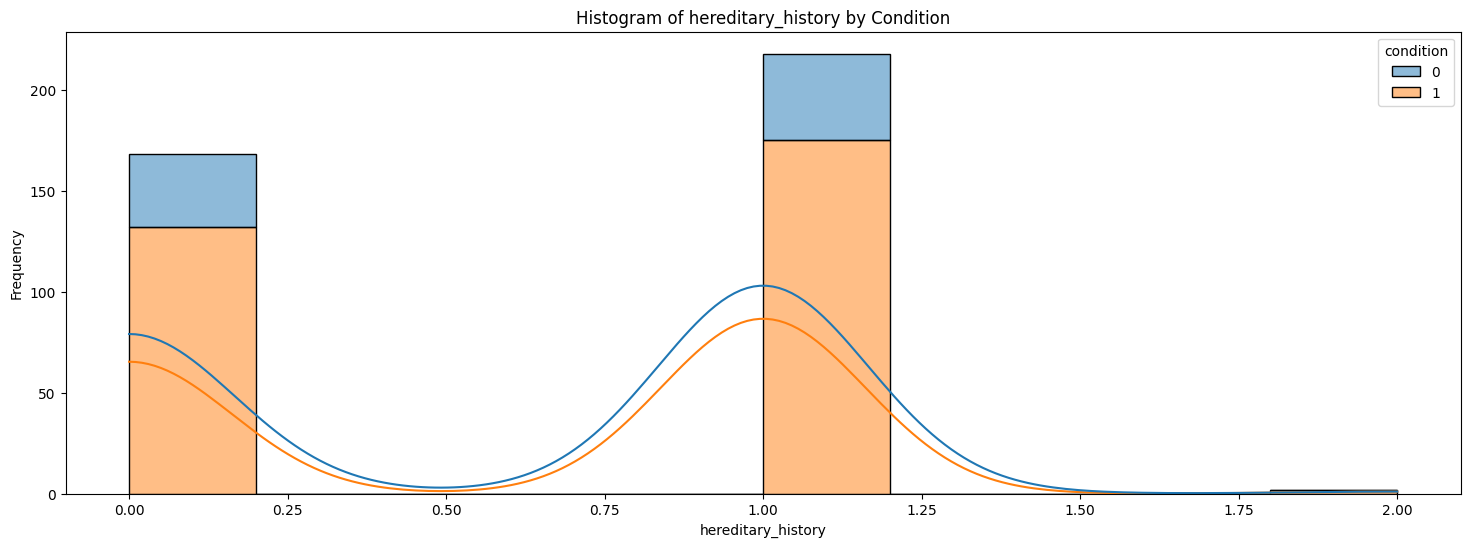

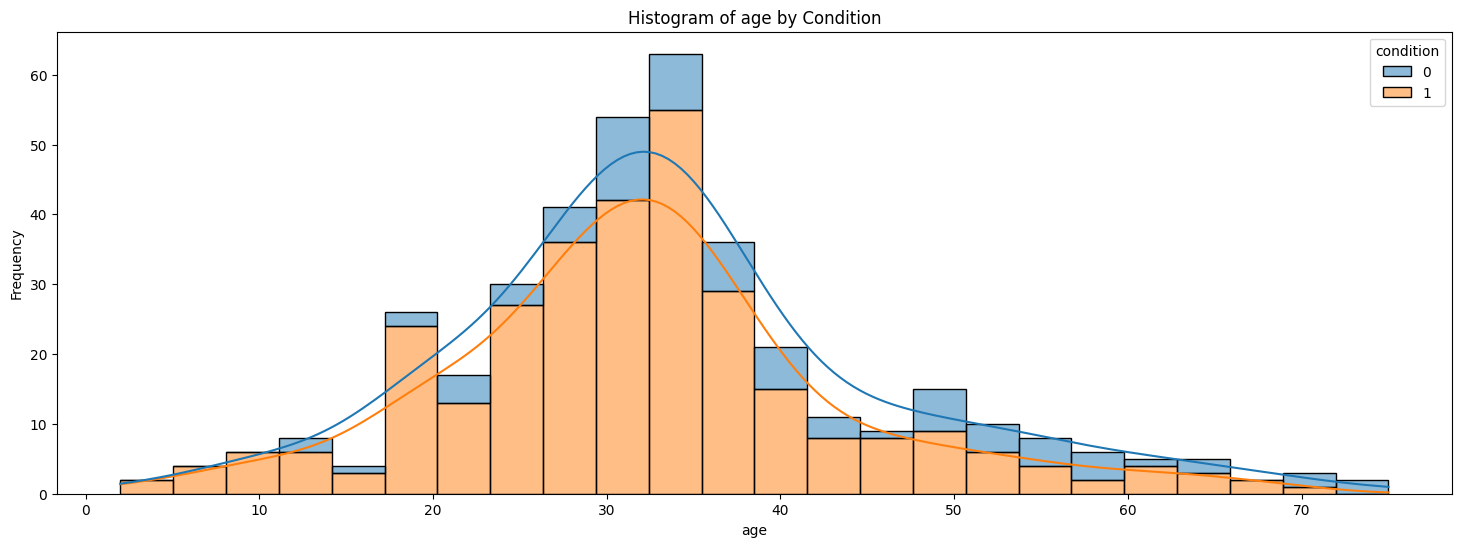

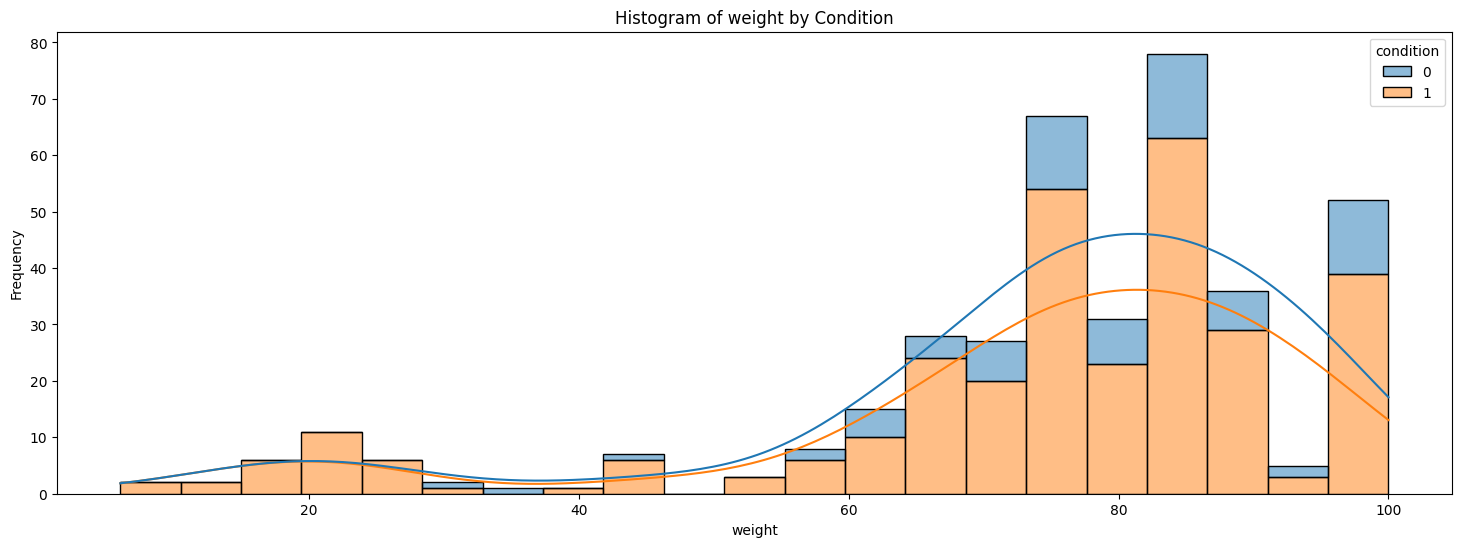

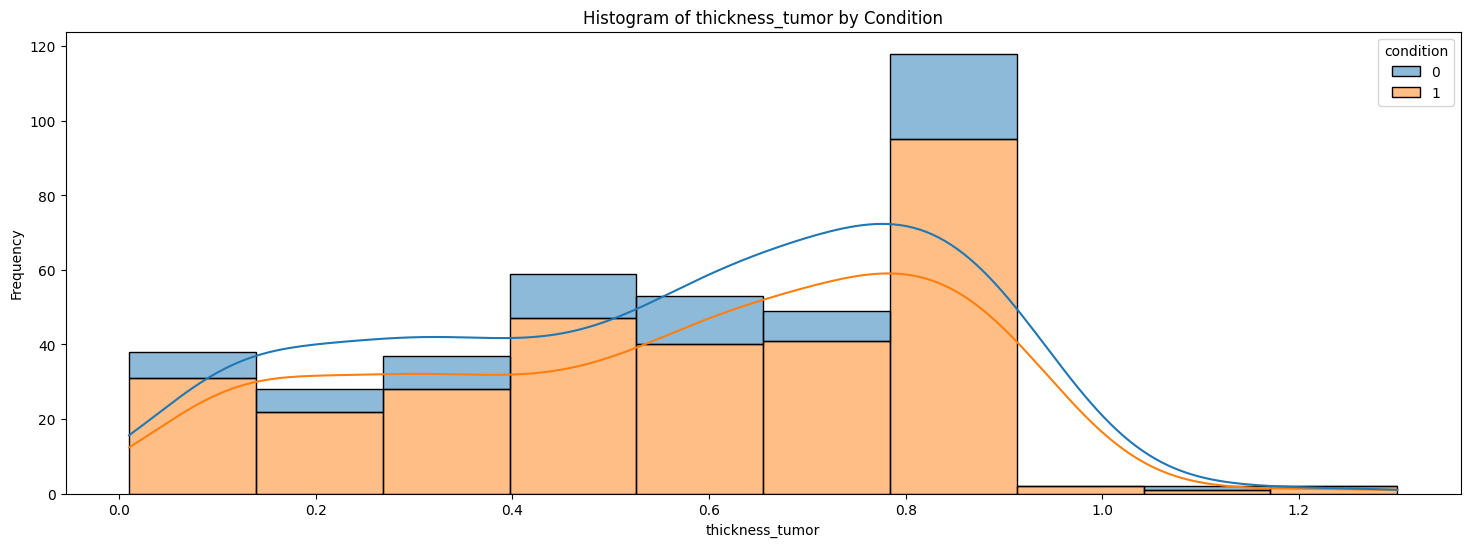

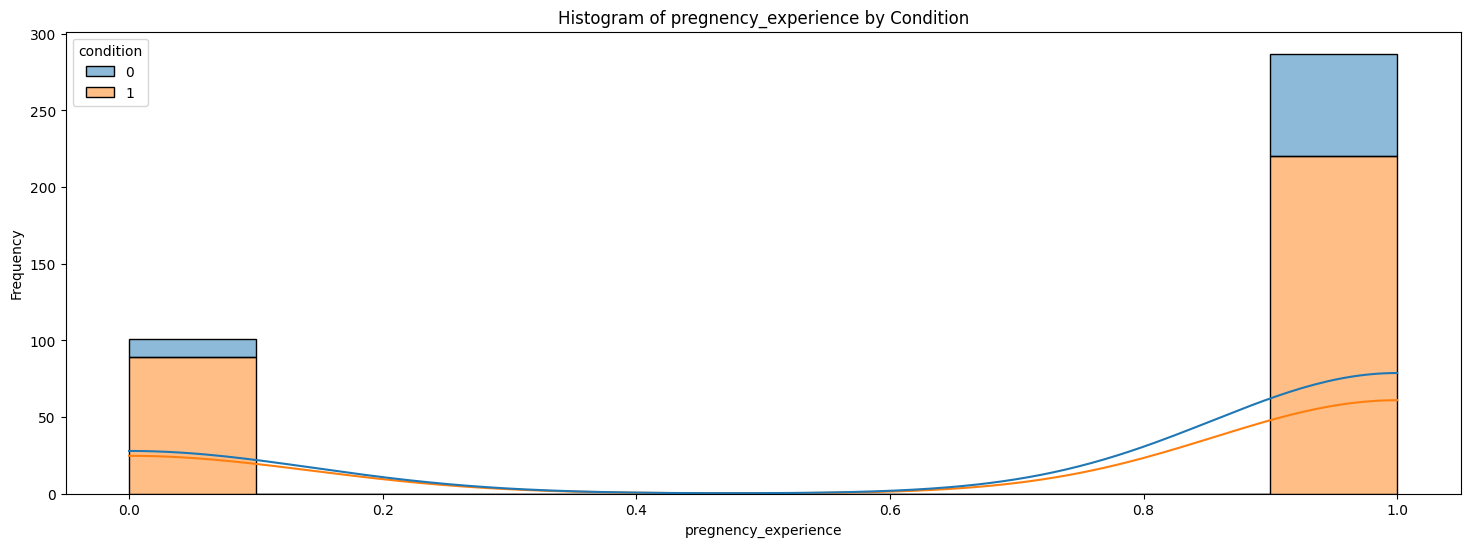

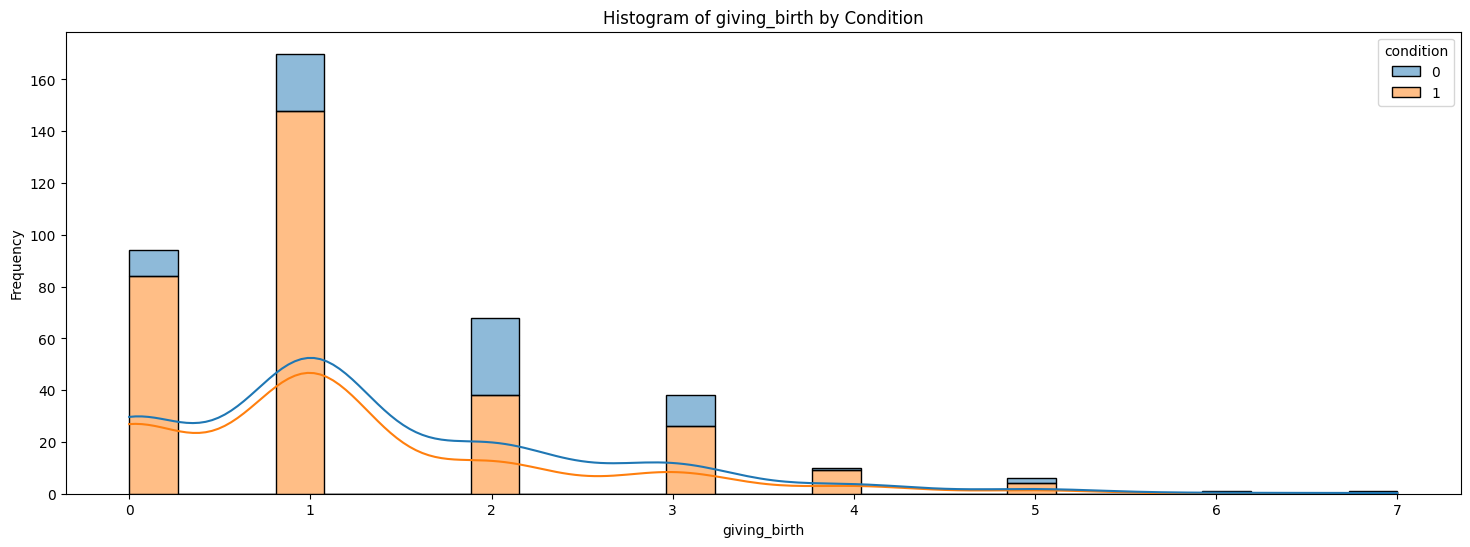

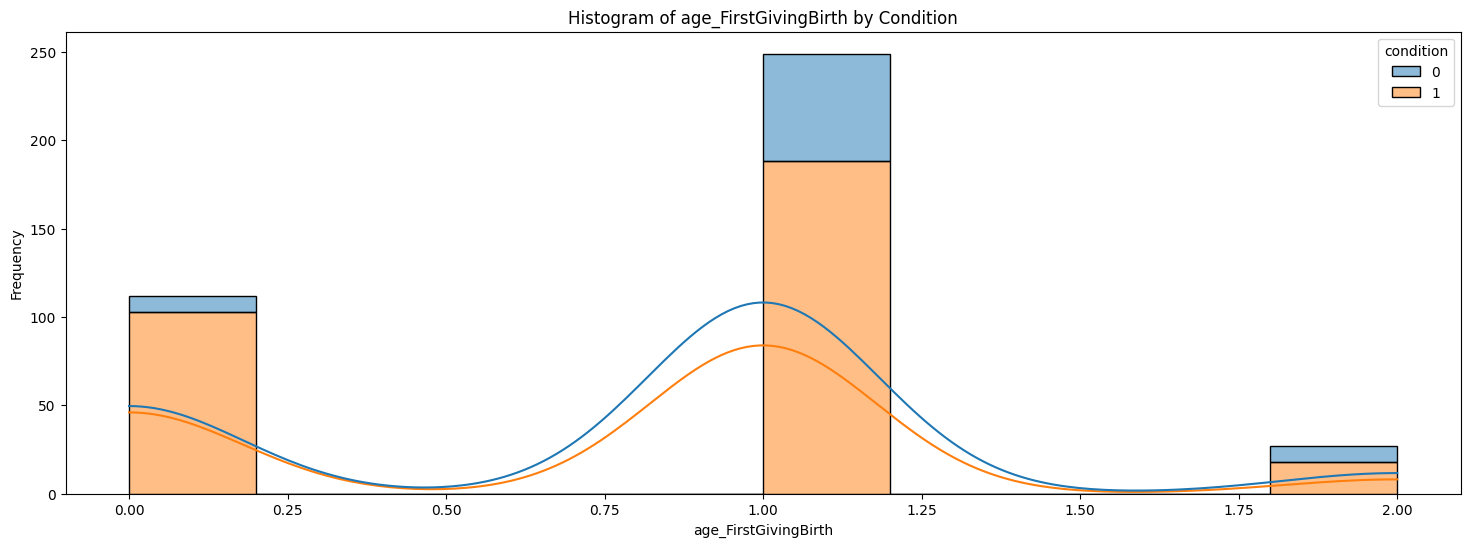

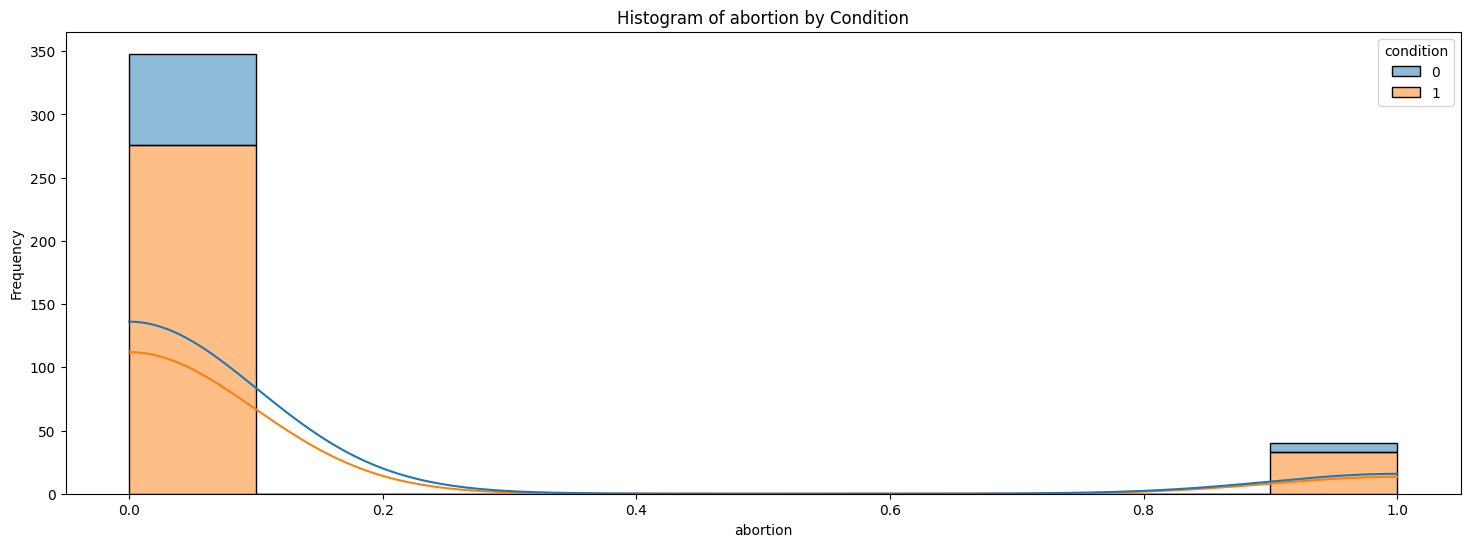

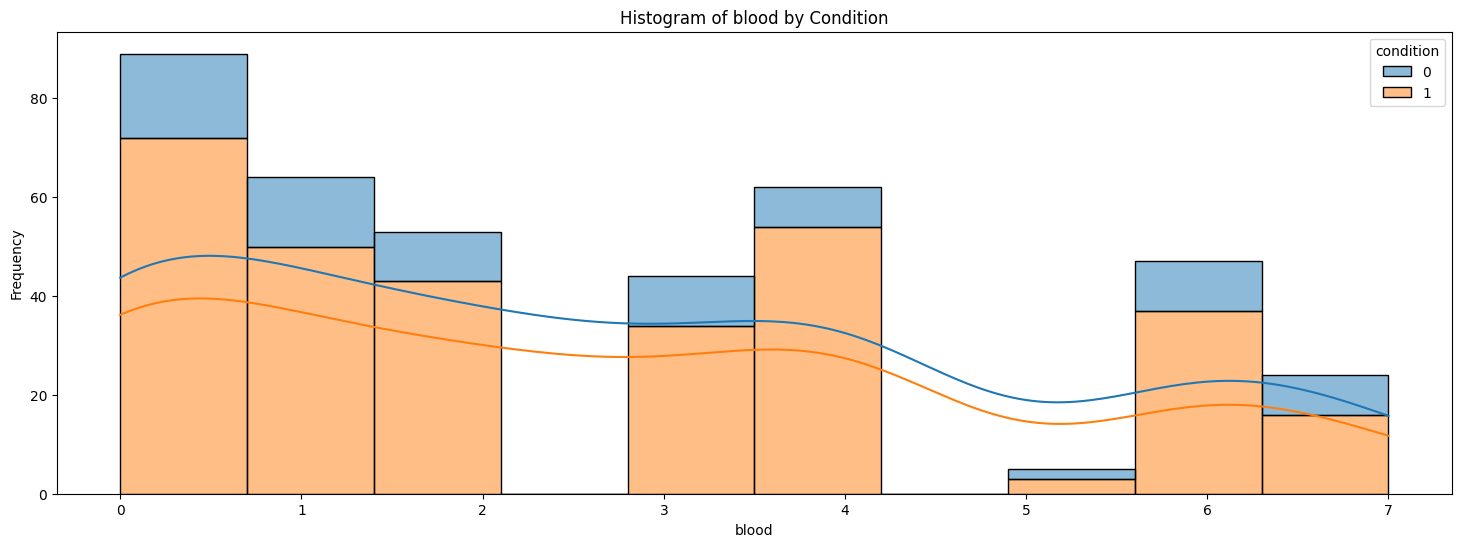

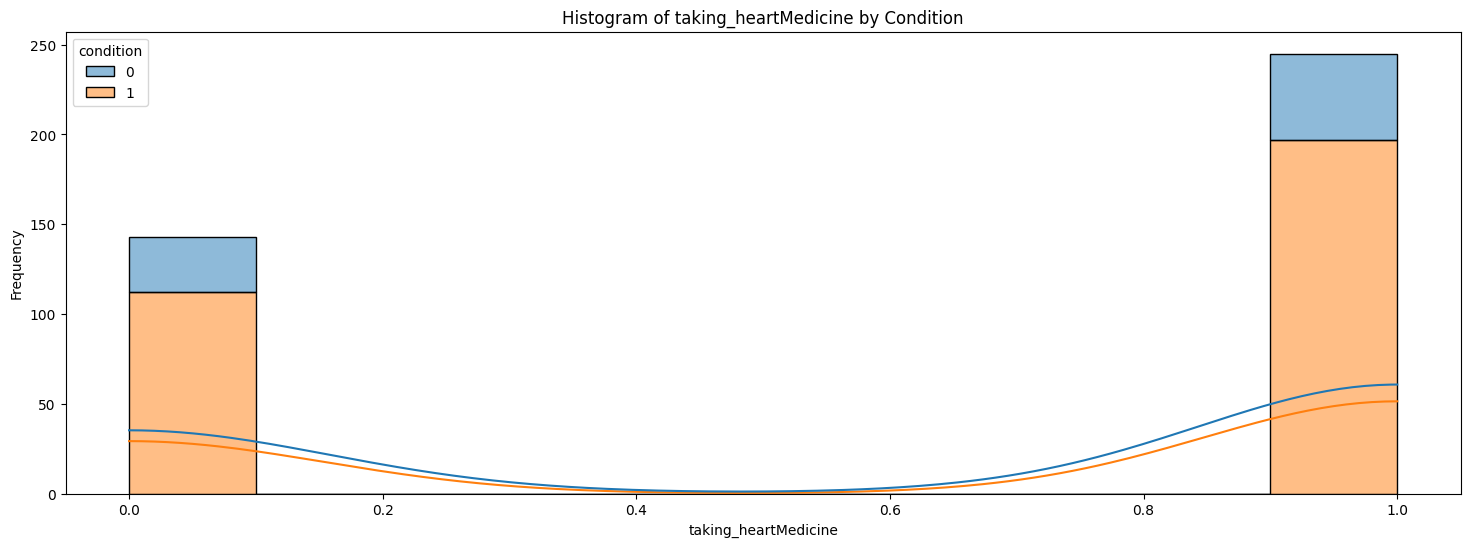

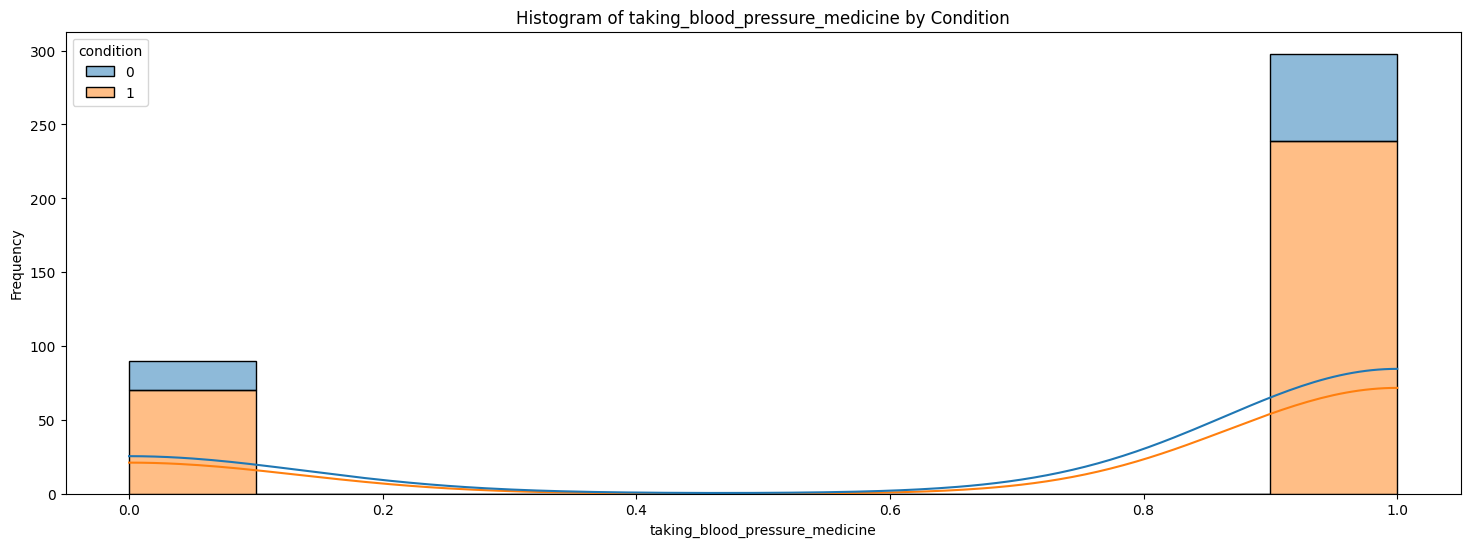

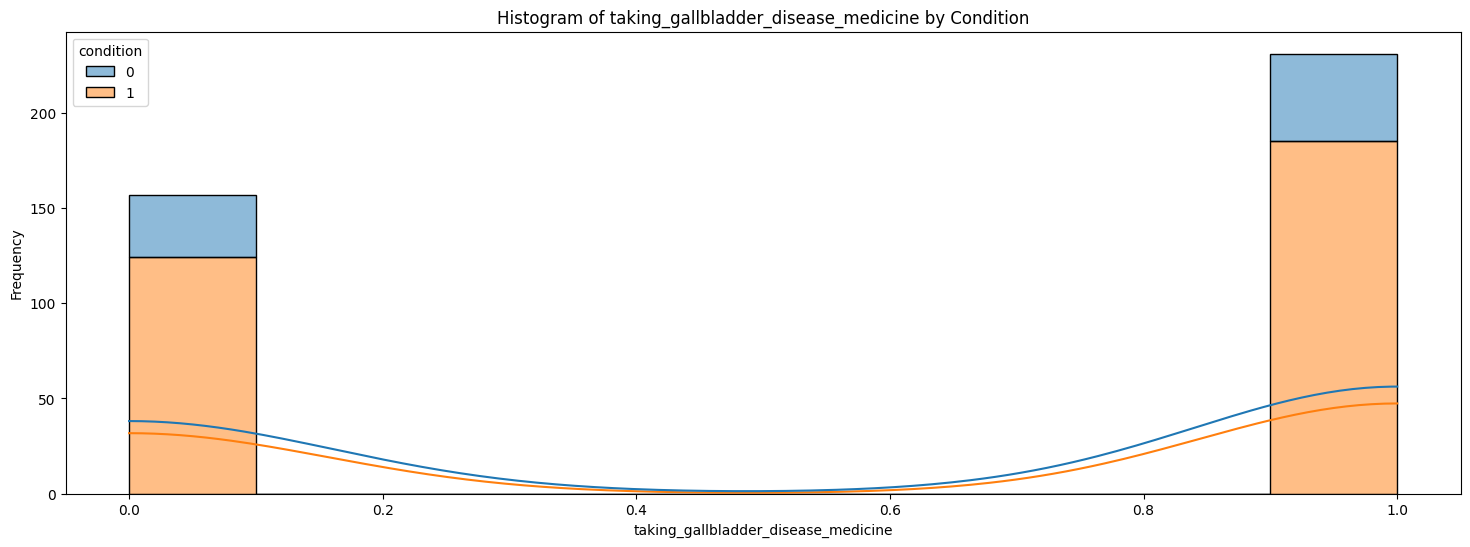

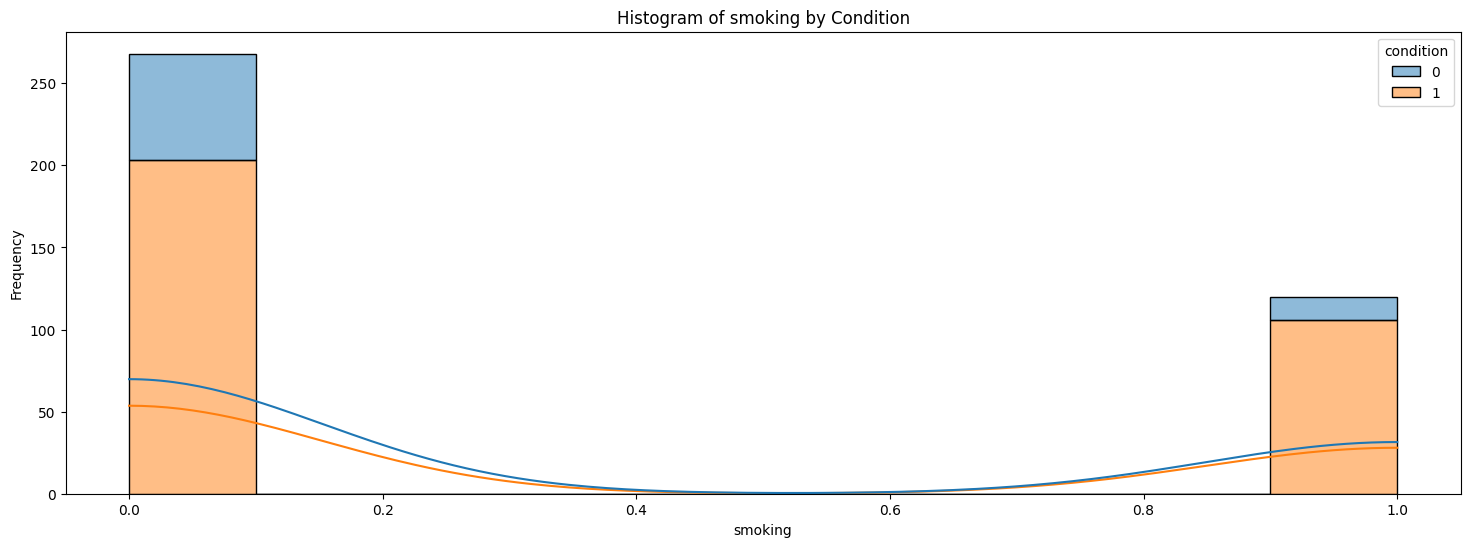

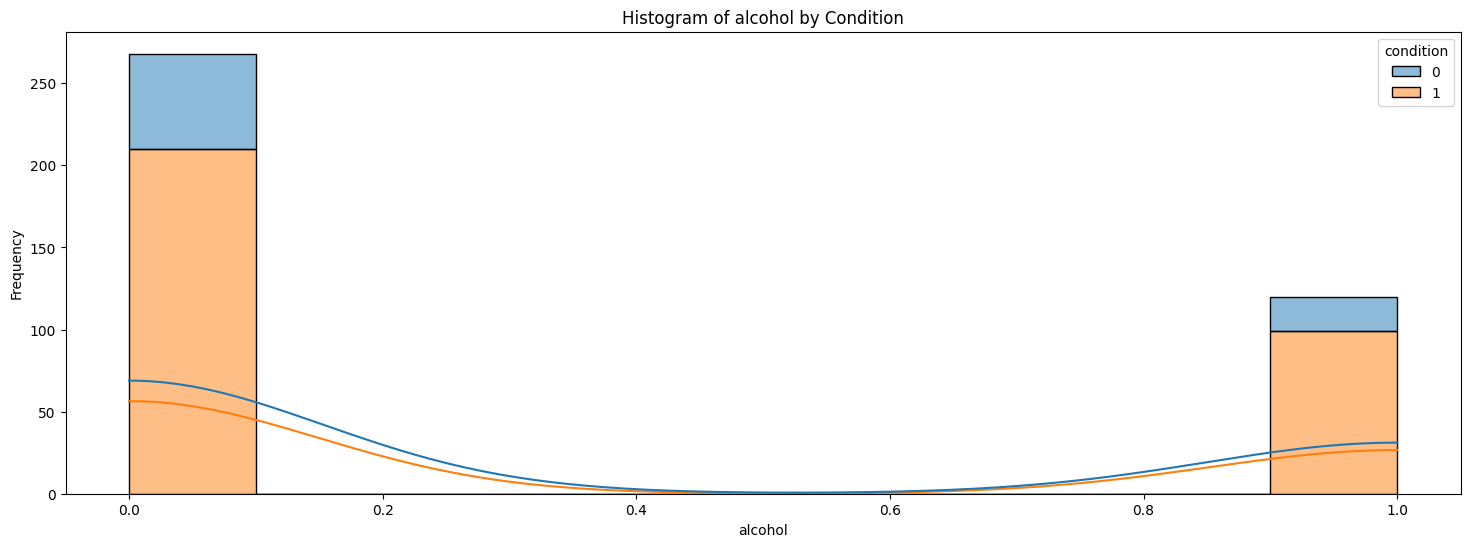

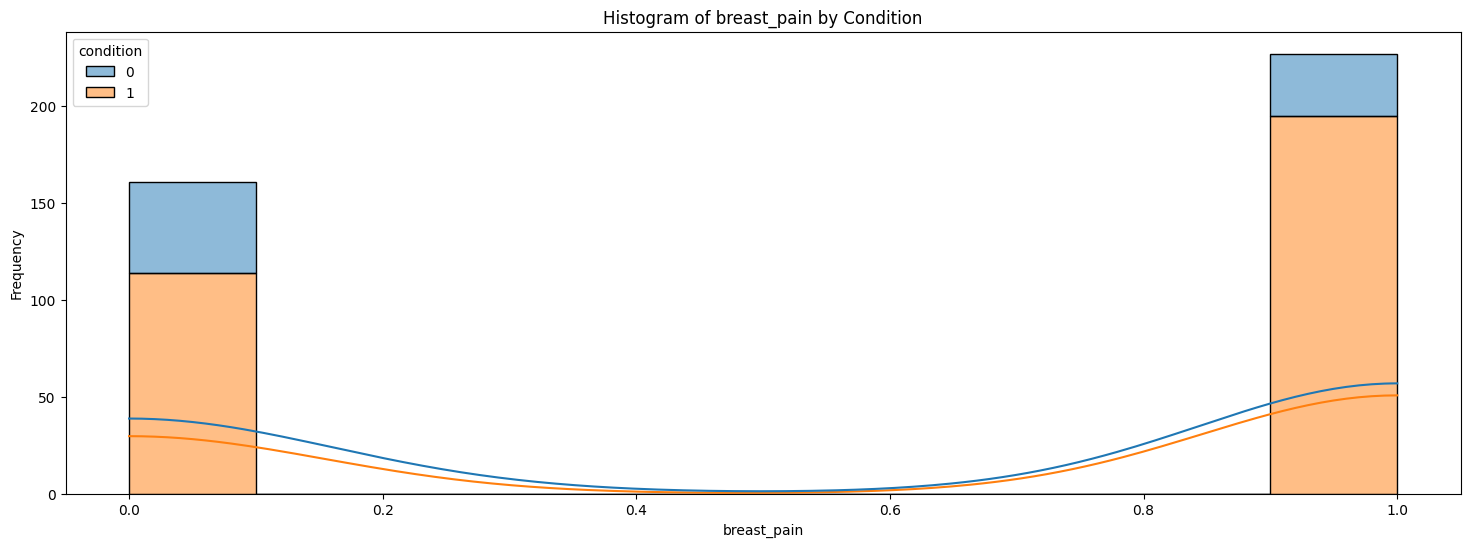

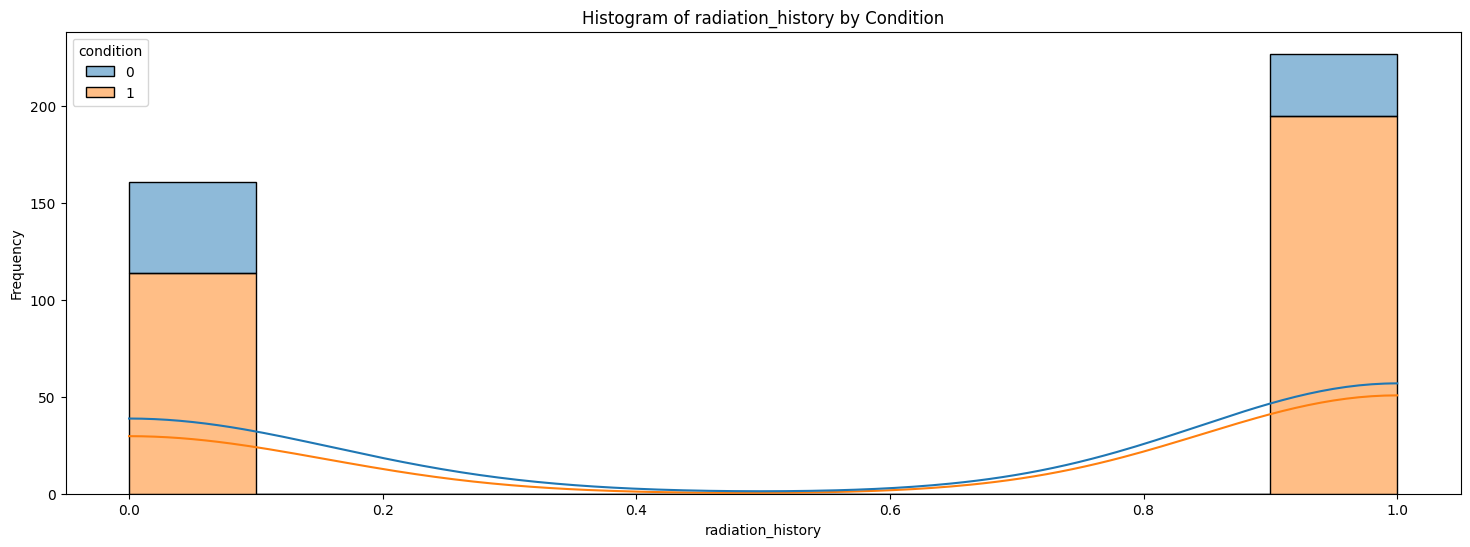

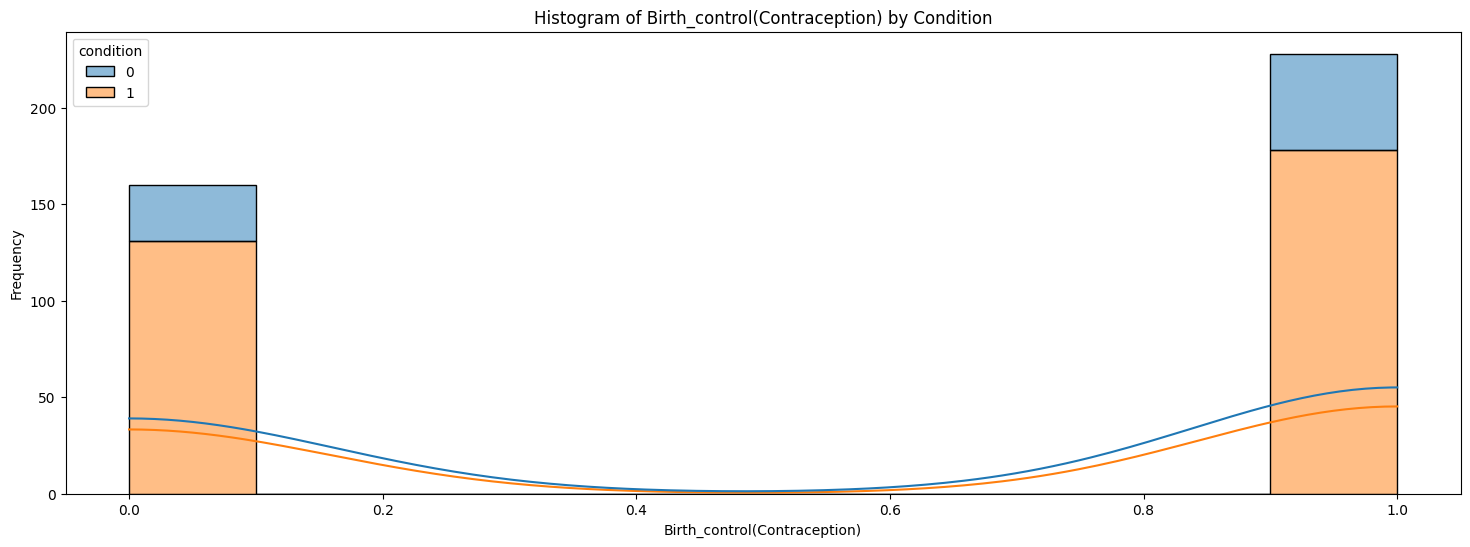

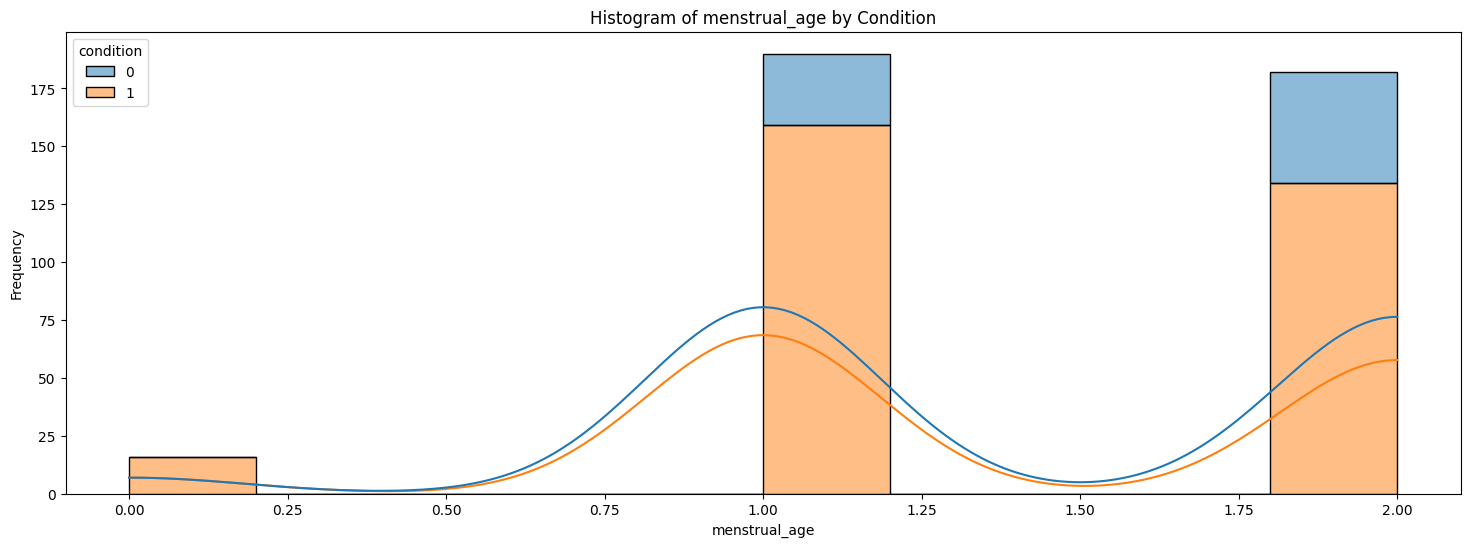

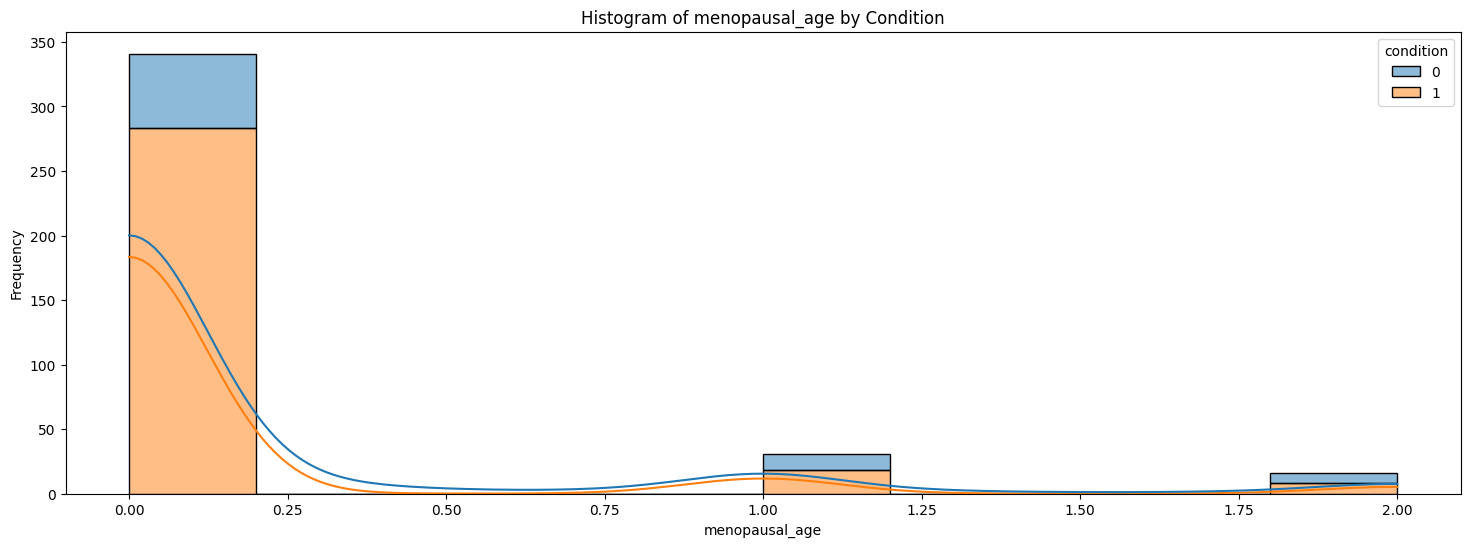

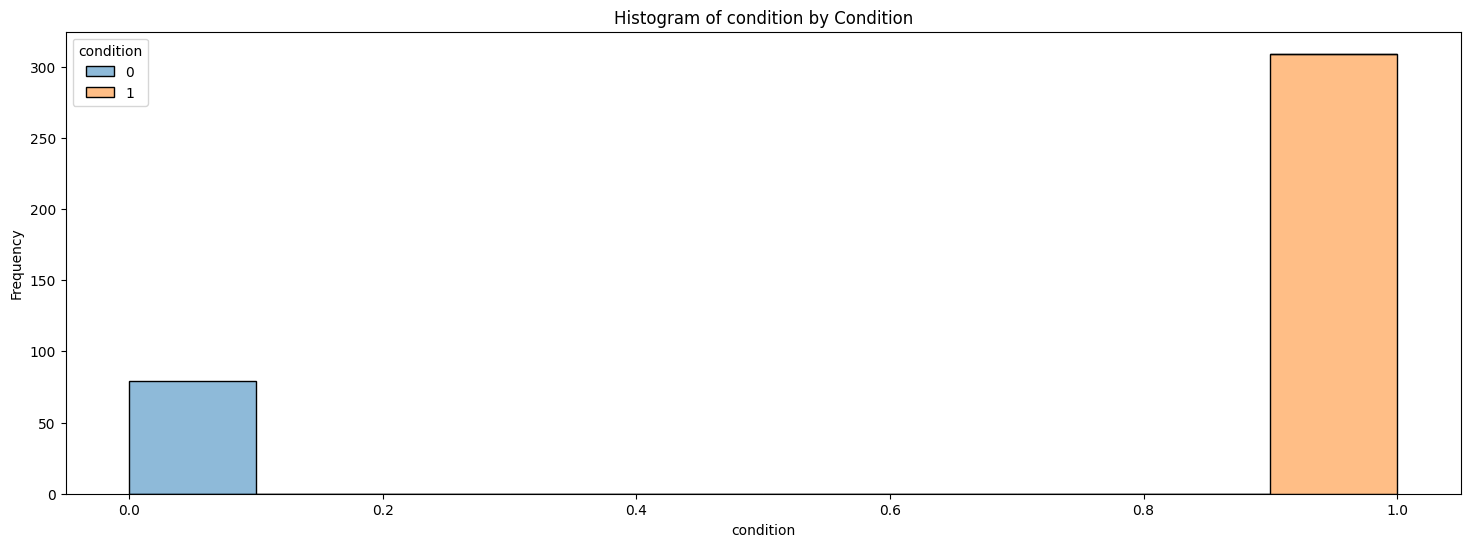

In [46]:
for column in survival_clean:
    f = plt.figure(figsize=(18, 6))
    sb.histplot(x=survival_clean[column], hue="condition", data=survival_clean, multiple="stack", kde=True)
    plt.title(f'Histogram of {column} by Condition')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


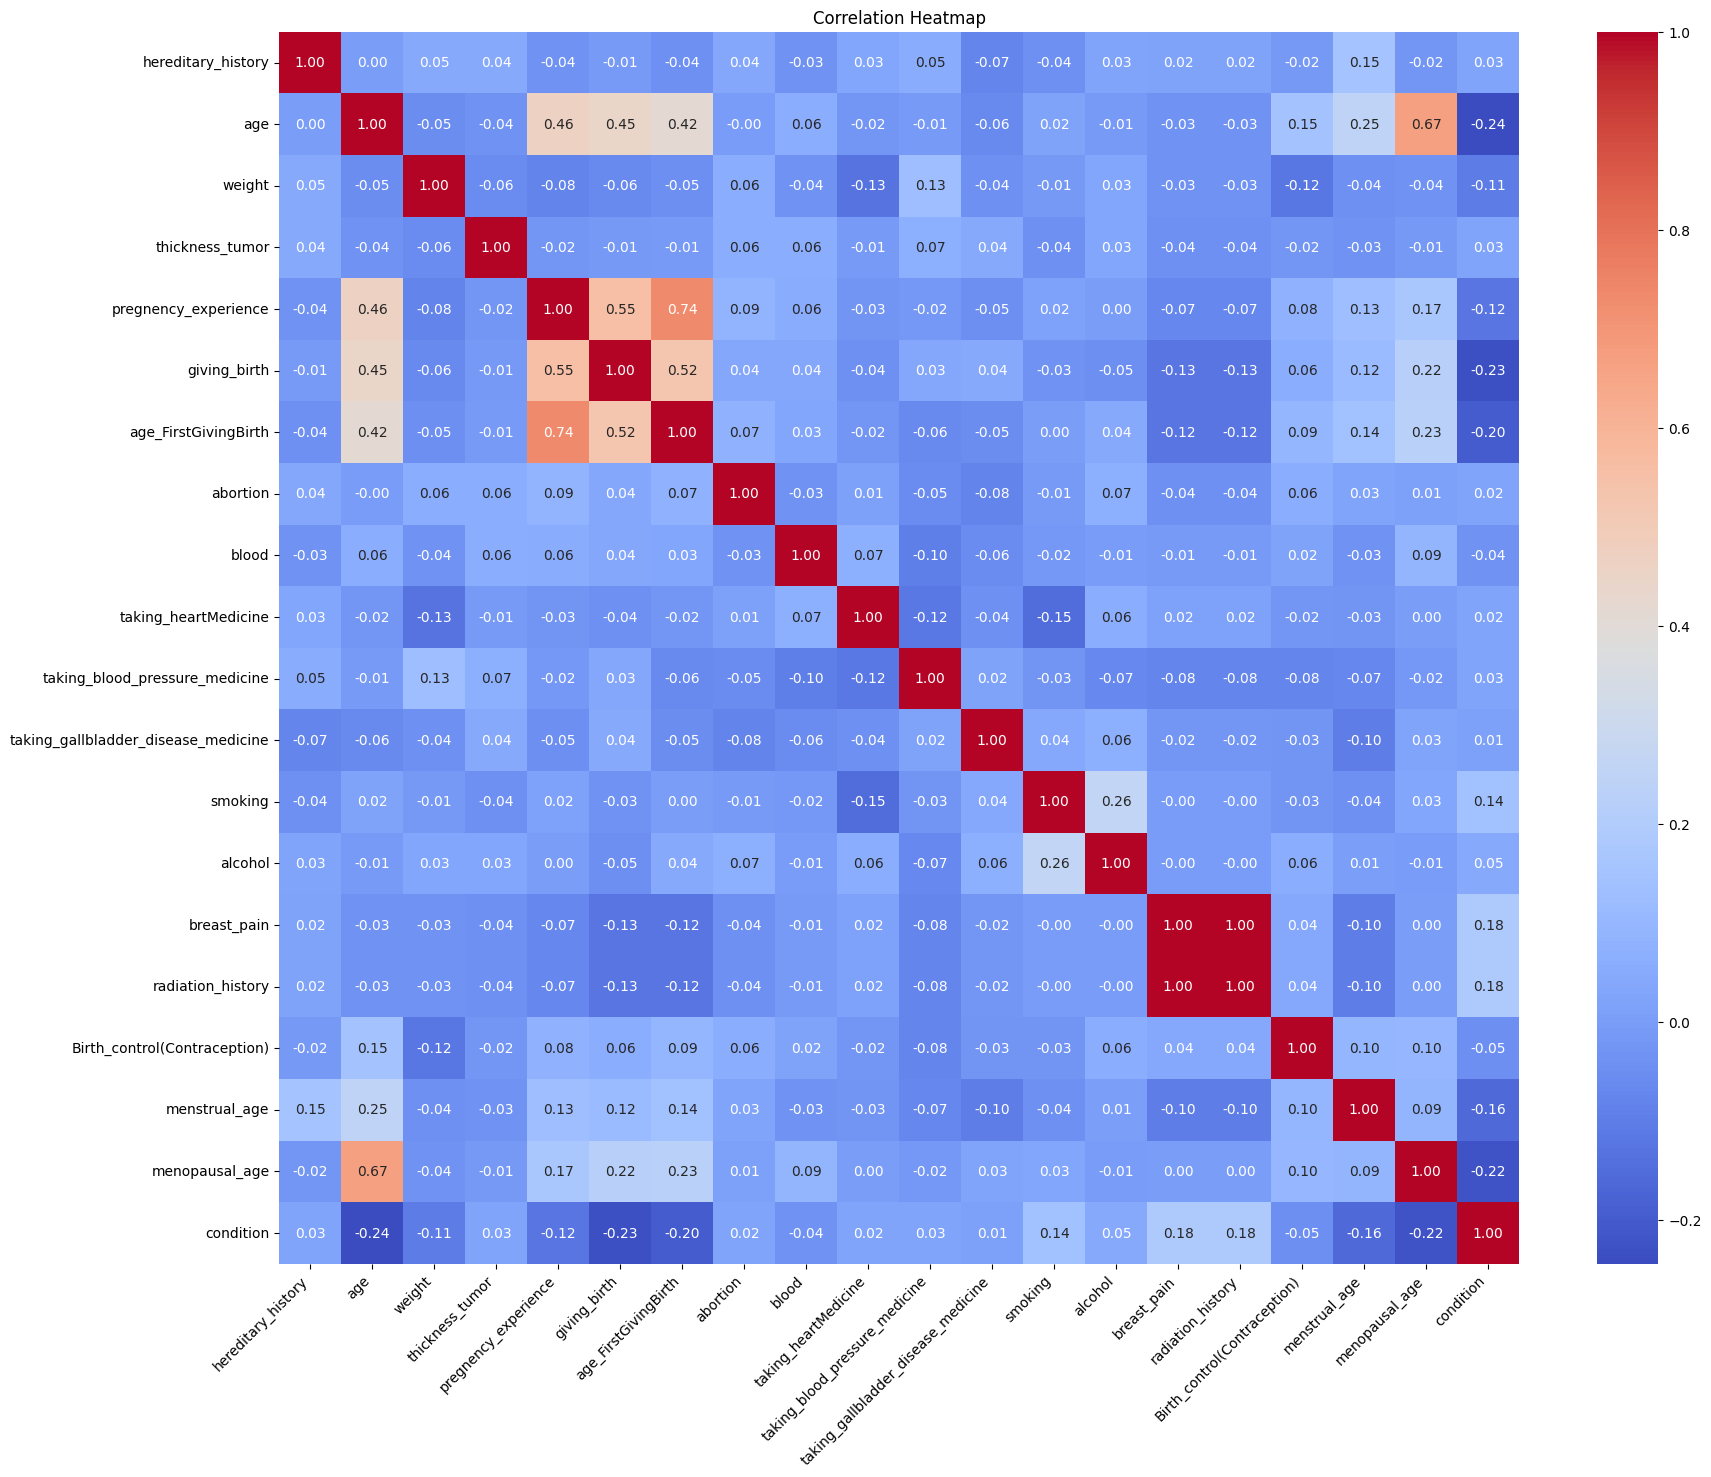

In [47]:
# Calculate the correlation matrix
corr_matrix = survival_clean.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.xticks(horizontalalignment='right')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
#import machine learning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [49]:
survival_clean = survival_clean.dropna()

condition = pd.DataFrame(survival_clean['condition'])

#Dropping the 'condition' column from survival_clean DataFrame
survival_cleaned = pd.DataFrame(survival_clean.drop(columns=['condition']))

survival_train, survival_test, condition_train, condition_test = train_test_split(survival_cleaned, condition, test_size = 0.25, random_state=1)

print("Train Set :",  survival_train.shape, condition_train.shape)
print("Test Set  :",  survival_test.shape, condition_test.shape)

Train Set : (291, 19) (291, 1)
Test Set  : (97, 19) (97, 1)


In [50]:
survival_cleaned

hereditary_history  age  weight  thickness_tumor  pregnency_experience  \
0                     1   30      69              0.9                     0   
2                     0   30      74              0.9                     0   
5                     1   30      79              0.7                     0   
6                     1   29      96              0.1                     0   
8                     1   29      89              0.7                     0   
..                  ...  ...     ...              ...                   ...   
735                   1   61      75              0.7                     1   
737                   1   30      96              0.8                     1   
738                   1   30      96              0.6                     1   
740                   1   43      79              0.6                     1   
741                   0   16      79              0.5                     0   

     giving_birth  age_FirstGivingBirth  abortion  blood  \
0               0                     0         0      4   
2               0                     0         1      4   
5               0                     0         0      6   
6               0                     0         0      4   
8               0                     0         0      1   
..            ...                   ...       ...    ...   
735             3                     1         0      3   
737             1                     1         0      7   
738             2                     2         0      4   
740             2                     2         0      7   
741             0                     0         0      3   

     taking_heartMedicine  taking_blood_pressure_medicine  \
0                       0                               1   
2                       1                               1   
5                       1                               1   
6                       1                               1   
8                       1                               1   
..                    ...                             ...   
735                     1                               0   
737                     1                               1   
738                     0                               1   
740                     1                               0   
741                     1                               1   

     taking_gallbladder_disease_medicine  smoking  alcohol  breast_pain  \
0                                      1        0        0            1   
2                                      0        0        0            1   
5                                      1        0        1            1   
6                                      0        0        0            1   
8                                      1        0        0            1   
..                                   ...      ...      ...          ...   
735                                    0        1        0            1   
737                                    0        0        0            1   
738                                    1        0        0            0   
740                                    0        0        1            0   
741                                    0        0        0            0   

     radiation_history  Birth_control(Contraception)  menstrual_age  \
0                    1                             1              1   
2                    1                             0              1   
5                    1                             1              1   
6                    1                             0              2   
8                    1                             0              2   
..                 ...                           ...            ...   
735                  1                             0              2   
737                  1                             1              1   
738                  0                             1          

## Using different classification algorithms, see which algorithms have a higher accuracy score

These are the list of classification algorithms we use:

- Logistic Regression
- KNN classifier
- SVC
- Decision Tree Classifier
- Random Forest Classifier
- Gaussian Naive Bayes



In [51]:
result_dict_train = {}
result_dict_test = {}

sc = StandardScaler()
survival_train_scaled = sc.fit_transform(survival_train)
survival_test_scaled = sc.fit_transform(survival_test)

condition_train = np.ravel(condition_train)
condition_test = np.ravel(condition_test)

# Logistic Regression
reg = LogisticRegression(random_state=42)
accuracies = cross_val_score(reg, survival_train_scaled, condition_train, cv=5)
reg.fit(survival_train_scaled, condition_train)
lr_pred = reg.predict(survival_test_scaled)
report = classification_report(condition_test, lr_pred, target_names=["Class 0", "Class 1"])
print("\nLogistic Regression:")
print(report)
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(survival_test_scaled, condition_test)

# KNN Classifier
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, survival_train_scaled, condition_train, cv=5)
knn.fit(survival_train_scaled, condition_train)
knn_pred = knn.predict(survival_test_scaled)
report = classification_report(condition_test, knn_pred, target_names=["Class 0", "Class 1"])
print("\nKNN Classifier:")
print(report)
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(survival_test_scaled, condition_test)

# SVC
svc = SVC(random_state=42)
accuracies = cross_val_score(svc, survival_train_scaled, condition_train, cv=5)
svc.fit(survival_train_scaled, condition_train)
svc_pred = svc.predict(survival_test_scaled)
report = classification_report(condition_test, svc_pred, target_names=["Class 0", "Class 1"])
print("\nSVC:")
print(report)
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(survival_test_scaled, condition_test)

# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
accuracies = cross_val_score(dtc, survival_train_scaled, condition_train, cv=5)
dtc.fit(survival_train_scaled, condition_train)
dt_pred = dtc.predict(survival_test_scaled)
report = classification_report(condition_test, dt_pred, target_names=["Class 0", "Class 1"])
print("\nDecision Tree Classifier:")
print(report)
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(survival_test_scaled, condition_test)

# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
accuracies = cross_val_score(rfc, survival_train_scaled, condition_train, cv=5)
rfc.fit(survival_train_scaled, condition_train)
rf_pred = rfc.predict(survival_test_scaled)
report = classification_report(condition_test, rf_pred, target_names=["Class 0", "Class 1"])
print("\nRandom Forest Classifier:")
print(report)
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(survival_test_scaled, condition_test)

# Gaussian Naive Bayes
gnb = GaussianNB()
accuracies = cross_val_score(gnb, survival_train_scaled, condition_train, cv=5)
gnb.fit(survival_train_scaled, condition_train)
gnb_pred = gnb.predict(survival_test_scaled)
report = classification_report(condition_test, gnb_pred, target_names=["Class 0", "Class 1"])
print("\nGaussian Naive Bayes:")
print(report)
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(survival_test_scaled, condition_test)

# Creating DataFrames from result dictionaries
df_result_train = pd.DataFrame.from_dict(result_dict_train, orient="index", columns=["Accuracy Score"])
df_result_test = pd.DataFrame.from_dict(result_dict_test, orient="index", columns=["Accuracy Score"])

print("Train Scores:")
print(df_result_train)
print("\nTest Scores:")
print(df_result_test)


Logistic Regression:
              precision    recall  f1-score   support

     Class 0       0.29      0.10      0.15        20
     Class 1       0.80      0.94      0.86        77

    accuracy                           0.76        97
   macro avg       0.54      0.52      0.51        97
weighted avg       0.69      0.76      0.72        97


KNN Classifier:
              precision    recall  f1-score   support

     Class 0       0.67      0.40      0.50        20
     Class 1       0.86      0.95      0.90        77

    accuracy                           0.84        97
   macro avg       0.76      0.67      0.70        97
weighted avg       0.82      0.84      0.82        97


SVC:
              precision    recall  f1-score   support

     Class 0       0.67      0.10      0.17        20
     Class 1       0.81      0.99      0.89        77

    accuracy                           0.80        97
   macro avg       0.74      0.54      0.53        97
weighted avg       0.78      

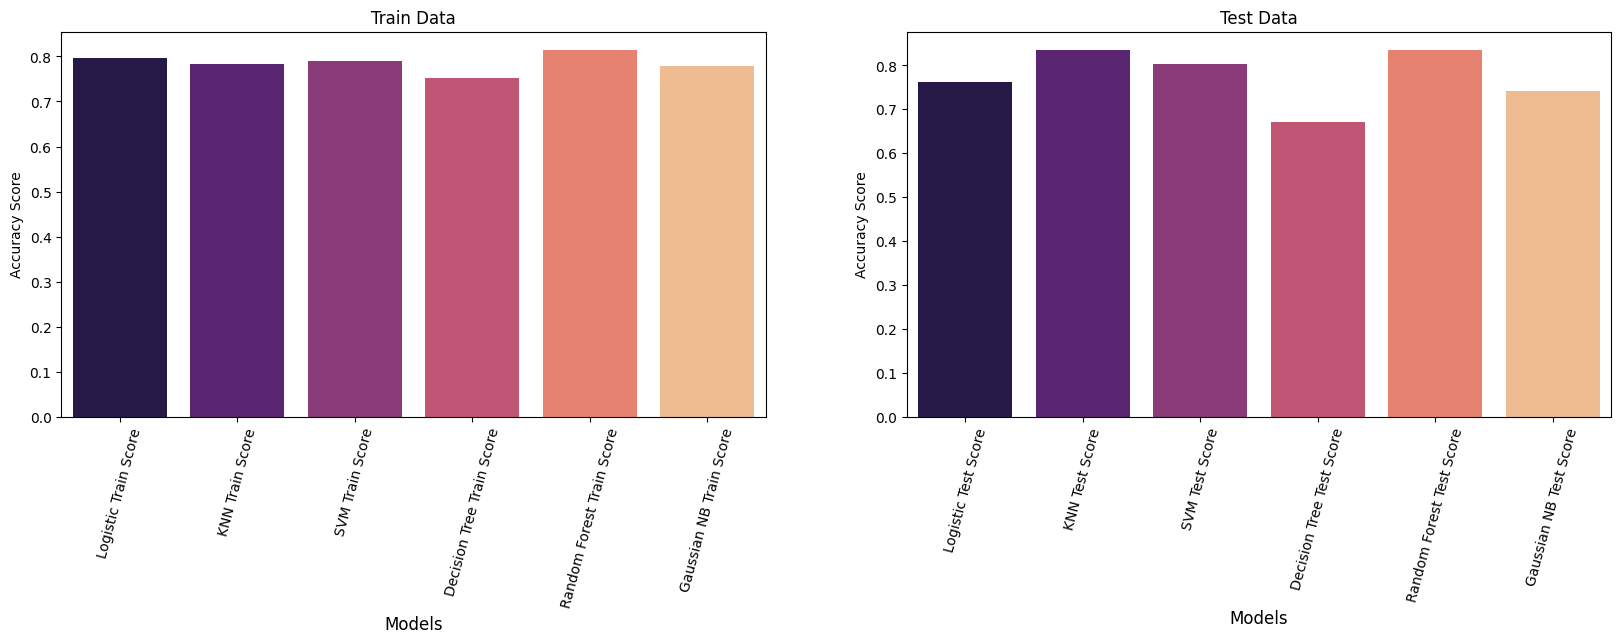

In [52]:
#show which classification algorithms has the best accuracy scores

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plotting the barplots with different colors for each bar
sb.barplot(x=df_result_train.index, y=df_result_train["Accuracy Score"], hue=df_result_train.index, legend=False, palette="magma", ax=ax[0])
sb.barplot(x=df_result_test.index, y=df_result_test["Accuracy Score"], hue=df_result_train.index, legend=False, palette="magma", ax=ax[1])

# Setting title for the first subplot
ax[0].set_title("Train Data")

# Setting title for the second subplot
ax[1].set_title("Test Data")

# Setting x-axis label for the first subplot
ax[0].set_xlabel("Models", fontsize=12)

# Setting x-axis label for the second subplot
ax[1].set_xlabel("Models", fontsize=12)

# Setting tick locations and labels for the first subplot
ax[0].set_xticks(range(len(df_result_train.index)))
ax[0].set_xticklabels(df_result_train.index, rotation=75)

# Setting tick locations and labels for the second subplot
ax[1].set_xticks(range(len(df_result_test.index)))
ax[1].set_xticklabels(df_result_test.index, rotation=75)

plt.show()

In [53]:
#here we find the importance of each predictors in predicting the condition of the patient

df_feature_importance = pd.DataFrame({'Importance': rfc.feature_importances_},
                                     index=survival_test.columns)

df_feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

print(df_feature_importance)

                                     Importance
age                                    0.204787
weight                                 0.124336
blood                                  0.090786
giving_birth                           0.089210
thickness_tumor                        0.083401
menopausal_age                         0.043795
menstrual_age                          0.039276
breast_pain                            0.033588
age_FirstGivingBirth                   0.032447
taking_blood_pressure_medicine         0.032371
taking_gallbladder_disease_medicine    0.032229
radiation_history                      0.029856
Birth_control(Contraception)           0.029725
alcohol                                0.027968
taking_heartMedicine                   0.027376
hereditary_history                     0.027060
smoking                                0.023917
pregnency_experience                   0.014439
abortion                               0.013433


In [54]:
preds  = rfc.predict(survival_test_scaled)
combined = pd.DataFrame(dict(actual = condition_test, prediction = preds))
pd.crosstab(index=combined["actual"],columns = combined["prediction"])

prediction  0   1
actual           
0           7  13
1           3  74

In [55]:
#Precision shows how often a model is correct when predicting the target class

precision_score(condition_test, preds)

0.8505747126436781

## Implementing SMOTE \(Synthetic Minority Over\-sampling Technique\)

we realise the cause of high accuracy and high precision by the predictors could be due to there are too much dataset on death as compared to recovered. Hence we decided to implement SMOTE \(Synthetic Minority Over\-sampling Technique\) to solve the imbalance in data.


In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

smote_survival, smote_condition = smote.fit_resample(survival_cleaned, condition)

smotesurvival_train, smotesurvival_test, smotecondition_train, smotecondition_test = train_test_split(smote_survival, smote_condition, test_size = 0.25)

print("Train Set :",  smotesurvival_train.shape, smotecondition_train.shape)
print("Test Set  :",  smotesurvival_test.shape, smotecondition_test.shape)

Train Set : (463, 19) (463, 1)
Test Set  : (155, 19) (155, 1)


Rerun the different classifer algorithms after implementing SMOTE


In [57]:
smoteresult_dict_train = {}
smoteresult_dict_test = {}

# Data preprocessing: Scale the features
sclr = StandardScaler()
smotesurvival_train_scaled = sclr.fit_transform(smotesurvival_train)
smotesurvival_test_scaled = sclr.transform(smotesurvival_test)

# Convert condition_train and condition_test to 1D arrays if they are not already
smotecondition_train = np.ravel(smotecondition_train)
smotecondition_test = np.ravel(smotecondition_test)

# Logistic Regression
reg = LogisticRegression(random_state=42)
accuracies = cross_val_score(reg, smotesurvival_train_scaled, smotecondition_train, cv=5)
reg.fit(smotesurvival_train_scaled, smotecondition_train)
lrpred = reg.predict(smotesurvival_test_scaled)
report = classification_report(smotecondition_test, lrpred, target_names=["Class 0", "Class 1"])
print("\nLogistic Regression:")
print(report)
smoteresult_dict_train["Logistic Train Score"] = np.mean(accuracies)
smoteresult_dict_test["Logistic Test Score"] = reg.score(smotesurvival_test_scaled, smotecondition_test)

# KNN Classifier
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, smotesurvival_train_scaled, smotecondition_train, cv=5)
knn.fit(smotesurvival_train_scaled, smotecondition_train)
knnpred = knn.predict(smotesurvival_test_scaled)
report = classification_report(smotecondition_test, knnpred, target_names=["Class 0", "Class 1"])
print("\nKNN Classifier:")
print(report)
smoteresult_dict_train["KNN Train Score"] = np.mean(accuracies)
smoteresult_dict_test["KNN Test Score"] = knn.score(smotesurvival_test_scaled, smotecondition_test)

# SVC
svc = SVC(random_state=42)
accuracies = cross_val_score(svc, smotesurvival_train_scaled, smotecondition_train, cv=5)
svc.fit(smotesurvival_train_scaled, smotecondition_train)
svcpred = svc.predict(smotesurvival_test_scaled)
report = classification_report(smotecondition_test, svcpred, target_names=["Class 0", "Class 1"])
print("\nSVC:")
print(report)
smoteresult_dict_train["SVM Train Score"] = np.mean(accuracies)
smoteresult_dict_test["SVM Test Score"] = svc.score(smotesurvival_test_scaled, smotecondition_test)

# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
accuracies = cross_val_score(dtc, smotesurvival_train_scaled, smotecondition_train, cv=5)
dtc.fit(smotesurvival_train_scaled, smotecondition_train)
dtpred = dtc.predict(smotesurvival_test_scaled)
report = classification_report(smotecondition_test, dtpred, target_names=["Class 0", "Class 1"])
print("\nDecision Tree Classifier:")
print(report)
smoteresult_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
smoteresult_dict_test["Decision Tree Test Score"] = dtc.score(smotesurvival_test_scaled, smotecondition_test)

# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
accuracies = cross_val_score(rfc, smotesurvival_train_scaled, smotecondition_train, cv=5)
rfc.fit(smotesurvival_train_scaled, smotecondition_train)
rfpred = rfc.predict(smotesurvival_test_scaled)
report = classification_report(smotecondition_test, rfpred, target_names=["Class 0", "Class 1"])
print("\nRandom Forest Classifier:")
print(report)
smoteresult_dict_train["Random Forest Train Score"] = np.mean(accuracies)
smoteresult_dict_test["Random Forest Test Score"] = rfc.score(smotesurvival_test_scaled, smotecondition_test)

# Gaussian Naive Bayes
gnb = GaussianNB()
accuracies = cross_val_score(gnb, smotesurvival_train_scaled, smotecondition_train, cv=5)
gnb.fit(smotesurvival_train_scaled, smotecondition_train)
gnbpred = gnb.predict(smotesurvival_test_scaled)
report = classification_report(smotecondition_test, gnbpred, target_names=["Class 0", "Class 1"])
print("\nGaussian Naive Bayes:")
print(report)
smoteresult_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
smoteresult_dict_test["Gaussian NB Test Score"] = gnb.score(smotesurvival_test_scaled, smotecondition_test)

# Creating DataFrames from result dictionaries
smotedf_result_train = pd.DataFrame.from_dict(smoteresult_dict_train, orient="index", columns=["Accuracy Score"])
smotedf_result_test = pd.DataFrame.from_dict(smoteresult_dict_test, orient="index", columns=["Accuracy Score"])

print("Train Scores:")
print(smotedf_result_train)
print("\nTest Scores:")
print(smotedf_result_test)


Logistic Regression:
              precision    recall  f1-score   support

     Class 0       0.81      0.83      0.82        76
     Class 1       0.83      0.81      0.82        79

    accuracy                           0.82       155
   macro avg       0.82      0.82      0.82       155
weighted avg       0.82      0.82      0.82       155


KNN Classifier:
              precision    recall  f1-score   support

     Class 0       0.78      0.91      0.84        76
     Class 1       0.90      0.76      0.82        79

    accuracy                           0.83       155
   macro avg       0.84      0.83      0.83       155
weighted avg       0.84      0.83      0.83       155


SVC:
              precision    recall  f1-score   support

     Class 0       0.85      0.84      0.85        76
     Class 1       0.85      0.86      0.86        79

    accuracy                           0.85       155
   macro avg       0.85      0.85      0.85       155
weighted avg       0.85      

In [58]:
smotepreds  = rfc.predict(smotesurvival_test_scaled)
smotecombined = pd.DataFrame(dict(actual = smotecondition_test, prediction = smotepreds))
pd.crosstab(index=smotecombined["actual"],columns = smotecombined["prediction"])

prediction   0   1
actual            
0           65  11
1            8  71

In [59]:
smotedf_feature_importance = pd.DataFrame({'Importance': rfc.feature_importances_},
                                     index=smotesurvival_test.columns)

smotedf_feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

print(smotedf_feature_importance)

                                     Importance
age                                    0.127608
weight                                 0.102396
thickness_tumor                        0.100542
radiation_history                      0.079450
breast_pain                            0.071245
smoking                                0.065307
blood                                  0.060942
alcohol                                0.057196
giving_birth                           0.051618
taking_heartMedicine                   0.041510
menopausal_age                         0.038226
taking_blood_pressure_medicine         0.033561
taking_gallbladder_disease_medicine    0.032935
hereditary_history                     0.031726
menstrual_age                          0.026541
age_FirstGivingBirth                   0.026032
Birth_control(Contraception)           0.024597
abortion                               0.015081
pregnency_experience                   0.013487


In [60]:
rf_prec = precision_score(smotecondition_test, smotepreds)
rf_recall = recall_score(smotecondition_test, smotepreds)
rf_f1 = f1_score(smotecondition_test, smotepreds)
print("Precision:", rf_prec)
print("Recall:", rf_recall)
print("F1:", rf_f1)

Precision: 0.8658536585365854
Recall: 0.8987341772151899
F1: 0.8819875776397516


## Implementing Deep Learning Model

We also wanted to see if deep learning model has a better accuracy while predicting. 

Comparison between Deep Learning Model \(Keras neural network model\) and Machine Learning Model \(Randomforest\)


Epoch 1/200


c:\Users\Edmund\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4938 - loss: 4.8679 - val_accuracy: 0.3404 - val_loss: 4.6300
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4348 - loss: 3.0334 - val_accuracy: 0.3404 - val_loss: 2.8623
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5478 - loss: 1.9261 - val_accuracy: 0.3404 - val_loss: 2.4295
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4941 - loss: 1.8451 - val_accuracy: 0.3404 - val_loss: 1.5188
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5374 - loss: 1.5350 - val_accuracy: 0.3404 - val_loss: 2.2758
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5394 - loss: 1.1906 - val_accuracy: 0.3404 - val_loss: 1.9414
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5948 - loss: 0.9811 - val_accuracy: 0.5745 - val_loss: 0.8759
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5750 - loss: 1.0542 - val_accuracy: 0.3404 - val_loss: 1.5

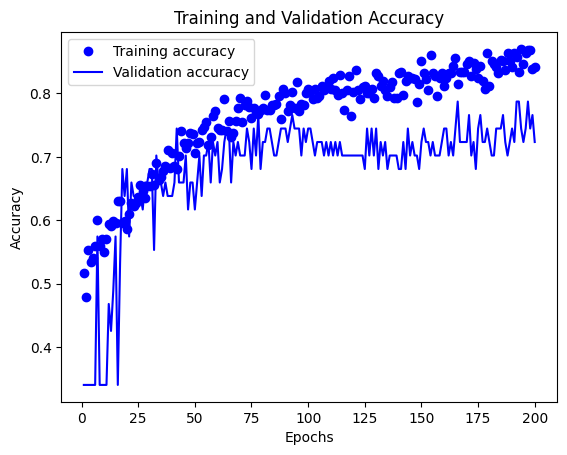

In [61]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(survival_cleaned.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

# Compile the model with a lower learning rate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with more epochs and a smaller batch size
history = model.fit(smotesurvival_train, smotecondition_train, epochs=200, batch_size=16, verbose=1, validation_split=0.1)

# Get training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

highest_acc = max(val_accuracy)
print("Highest Validation Accuracy:", highest_acc)

# Plot the training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
test_loss, test_accuracy = model.evaluate(smotesurvival_test, smotecondition_test, verbose=0)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.4150063693523407
Test Accuracy: 0.85161292552948


Even though Keras Neural Network Model seem to have a high accuracy while training the model, it ultimately led to a lower accuracy on the test dataset as compared to the Randomforest Classification Model. This might be due to the lack of data for Deep Learning models to work effectively. 



## Predicting the 'condition' using the dataset "undertreatment"

Using the trained randomforest classification, we can use it to find out the condition of patients still under going treatment


In [63]:
undertreatmenturl = 'https://raw.githubusercontent.com/edmundyoyo/SC1015_MiniProj/main/under%20treatment.csv'
undertreatment = pd.read_csv(undertreatmenturl)
undertreatment.head()

patient_id  gender   education  treatment_data  id_healthcenter  \
0  111038163288        0          4            2019       1110000306   
1  111038152771        0          3            2019       1110000126   
2  111038175699        0          2            2019       1110000311   
3  111038141164        0          3            2019       1110000077   
4  111038158630        0          1            2019       1110000048   

   id_treatment_region  hereditary_history  birth_date  age  weight  ...  \
0           1110000330                   1        1990   29      77  ...   
1           1110000330                   0        1982   37      96  ...   
2           1110000330                   1        1986   33      89  ...   
3           1110000329                   1        1956   63      88  ...   
4           1110000330                   0        1994   25      76  ...   

   taking_gallbladder_disease_medicine  smoking alcohol breast_pain  \
0                                    0        0       0           1   
1                                    0        0       1           1   
2                                    1        0       0           0   
3                                    1        1       0           1   
4                                    0        1       1           1   

  radiation_history Birth_control(Contraception) \nmenstrual_age  \
0                 0                            0               1   
1                 1                            1               1   
2                 0                            1               2   
3                 1                            1               1   
4                 0                            1               1   

   \nmenopausal_age  \nBenign_malignant_cancer        condition  
0               0.0                          0  under treatment  
1               0.0                          0  under treatment  
2               0.0                          0  under treatment  
3               2.0                          1  under treatment  
4               0.0                          1  under treatment  

[5 rows x 30 columns]

In [64]:
treatment_column = {col: col.replace(' ', '').replace('\n', '') for col in undertreatment.columns}

# Rename the columns using the dictionary
undertreatment = undertreatment.rename(columns=treatment_column)

#read only the female data since our dataset "original" is all females only
undertreatment = undertreatment[undertreatment["gender"] == 0]

undertreatment_clean = pd.DataFrame(undertreatment[['hereditary_history', 'age', 'weight', 'thickness_tumor', 'pregnency_experience', 'giving_birth', 'age_FirstGivingBirth', 'abortion', 'blood', 'taking_heartMedicine', 'taking_blood_pressure_medicine', 'taking_gallbladder_disease_medicine', 'smoking', 'alcohol', 'breast_pain', 'radiation_history', 'Birth_control(Contraception)', 'menstrual_age', 'menopausal_age', 'condition']])

undertreatment_clean['blood'] = undertreatment_clean['blood'].replace(44, 0)

undertreatment_clean['breast_pain'] = undertreatment_clean['breast_pain'].replace(11, 1)

undertreatment_clean['radiation_history'] = undertreatment_clean['radiation_history'].replace(11, 0)

undertreatment_clean = undertreatment_clean.dropna()

undertreatment_clean = pd.DataFrame(undertreatment_clean.drop(columns =["condition"]))

In [65]:
undertreatment_clean["pregnency_experience"] = undertreatment_clean["pregnency_experience"].astype("category").cat.codes
undertreatment_clean["giving_birth"] = undertreatment_clean["giving_birth"].astype("category").cat.codes
undertreatment_clean["age_FirstGivingBirth"] = undertreatment_clean["age_FirstGivingBirth"].astype("category").cat.codes
undertreatment_clean["abortion"]= undertreatment_clean["abortion"].astype("category").cat.codes

In [66]:
undertreatment_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 0 to 270
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   hereditary_history                   270 non-null    int64  
 1   age                                  270 non-null    int64  
 2   weight                               270 non-null    int64  
 3   thickness_tumor                      270 non-null    float64
 4   pregnency_experience                 270 non-null    int8   
 5   giving_birth                         270 non-null    int8   
 6   age_FirstGivingBirth                 270 non-null    int8   
 7   abortion                             270 non-null    int8   
 8   blood                                270 non-null    int64  
 9   taking_heartMedicine                 270 non-null    int64  
 10  taking_blood_pressure_medicine       270 non-null    int64  
 11  taking_gallbladder_disease_medicine  

In [67]:
predictions_new = rfc.predict(undertreatment_clean)

c:\Users\Edmund\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [68]:
predictions_df = pd.DataFrame(predictions_new, columns=['Predictions'])

undertreatment_clean["prediction"] = predictions_df

undertreatment_clean = undertreatment_clean.dropna() 

undertreatment_clean.head()

hereditary_history  age  weight  thickness_tumor  pregnency_experience  \
0                   1   29      77              0.9                     1   
1                   0   37      96              0.5                     0   
2                   1   33      89              0.9                     0   
3                   1   63      88              0.4                     1   
4                   0   25      76              0.5                     1   

   giving_birth  age_FirstGivingBirth  abortion  blood  taking_heartMedicine  \
0             1                     1         1      0                     0   
1             0                     0         0      4                     0   
2             0                     0         0      2                     1   
3             5                     1         1      0                     0   
4             3                     1         0      0                     1   

   taking_blood_pressure_medicine  taking_gallbladder_disease_medicine  \
0                               1                                    0   
1                               0                                    0   
2                               1                                    1   
3                               0                                    1   
4                               0                                    0   

   smoking  alcohol  breast_pain  radiation_history  \
0        0        0            1                  0   
1        0        1            1                  1   
2        0        0            0                  0   
3        1        0            1                  1   
4        1        1            1                  0   

   Birth_control(Contraception)  menstrual_age  menopausal_age  prediction  
0                             0              1             0.0         0.0  
1                             1              1             0.0         1.0  
2                             1              2             0.0         0.0  
3                             1              1             2.0         1.0  
4                             1              1             0.0         1.0

Using the training model from the survival dataset, we can use it to predict on patients undergoing treatment to determine the outcome of their \#condition whether it is death or recovered.
